# Introductory note
<a id='section0'></a>
This is a [Jupyter Notebook](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html) with the purpose of making you familiar with the basic Python-based [Brightway2 LCA framework](https://brightwaylca.org/) and its various functionalities, all developed by [Chris Mutel and colleagues](https://2.docs.brightwaylca.org/credits.html#authors).

This notebook is designed to get you started with creating your own project, setting up your database(s) (used as background systems) and simple foreground systems, performing your first impact assessments, analysing your results, and running Monte Carlo simulations in calculation setups.

Since Brightway2 builds on Python, a widely used programming language for scientific analysis, and can be installed easiest through the package and environment mangement system [*conda*](https://docs.conda.io/projects/conda/en/latest/), we need to get either [Anaconda](https://www.anaconda.com/), an open source distribution for multiple languages including Python and R, or at least [Miniconda](https://docs.conda.io/en/latest/miniconda.html), the bootstrap version of Anaconda. The full Anaconda installation contains, among others, a terminal and an IDE (integrated development environment). And, good for us, it natively installs the setup for Jupyter Notebooks, through which we can work most effectively with Brightway2. Both Jupyter and Brightway can also be installed through [*pip*](https://jupyter.readthedocs.io/en/latest/install.html#new-to-python-and-jupyter), but it may be a tad trickier.

For clarification: *conda* is, just like *pip*, a package and environment management system; the difference, however, is that "*pip* installs python packages within any environment; *conda* installs any package within conda environments." (quote from [here](https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/))

<br>

---

**Recommended prerequisites are:**
* having installed [Brightway2](https://2.docs.brightwaylca.org/installation.html) + all relevant packages (make sure to do so in the correct virtual environment) and possibly even having had a first quick look at its [documentation](https://docs.brightwaylca.org/index.html). <ins>*Credits where credits are due:*</ins> much of the present notebook is based both directly and indirectly on this documentation (and the [example notebooks](https://docs.brightwaylca.org/notebooks.html#example-notebooks))
* knowledge of the foundations of life cycle assessment. If you don't have this knowledge (or simply need a refresher), have a look at the [online teaching resources](http://www.teaching.industrialecology.uni-freiburg.de/) provided by the Industrial Ecology Freiburg Group, led by Stefan Pauliuk
* familiarity with any programming language - no Python-specific requirements, as most methods are quite intuitive and will be explained anyway. In case you are a bloody beginner, check [this](https://github.com/PoutineAndRosti/Brightway-Seminar-2017/blob/master/Day%201%20AM/1%20-%20Python%20and%20notebook%20basics.ipynb) out :)

<br>

---

**For Jupyter newbies**

In a [Jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/index.html) everything is live and interactive. And, perhaps more interesting, markdown elements and actual code are mixed - and you can even include images, videos, and other formats. There are [many](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks), [many](https://rise.readthedocs.io/en/maint-5.5/index.html) things that you can do with such notebooks, and there are also many [cool](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) [tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) as well as some [extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions).

To get you started, you might want to press the `h`-key, which gives you an overview of keyboard shortcuts. Then, you have markdown (richt text containing) cells and code cells: if you hover over and select any cell by clicking on it (notice the blue bar on the left of the cell; turns green when you are in edit mode, i.e. having clicked into the cell box) you can turn it into either a markdown one by pressing `m` or into a code cell by pressing `y`; there are other types, too, but they are not relevant for what we want to do. Click on a cell to select it or simply use the arrow keys to navigate. If you want to run a cell, simply press `shift+enter`. And if you want to insert an empty cell above or below the current one, simply press `a` or `b`. For changing the contents of a cell, either doubleclick a markdown cell or click a code cell; pressing `enter` works, too. You can exit a cell using `Esc` and can copy, cut, and paste cells when pressing the keys `c`, `x`, and `v` when having selected a cell. As for the output of a command, note that clicking on it once makes it scroll-able, clicking on it twice results in hiding it.

You will notice further below that there are sometimes commands starting with `import`. These ones are needed to "import" the code of the respective package into the present code. For instance, by importing the Brightway2 package you enable the present notebook to use the Brightway2 functionalities. To have access to these packages, you need to download them first; otherwise you will receive an error message. You can download such packages in two ways: either in the notebook or in the terminal (make sure to be in the right virtual environment). To find out more about that I would advise you to use the search engine of your choice ;)

These are the absolute basics, but they are already more than what you need here. Because you basically just need to run the presented cells.

<br>

---

**Recap on LCA**

To make sure we are on the same page, let's recapitulate the basics of LCA, expressed in a single formula (the notation may differ to the one that you are familiar with):

$$h = CBA^{-1}f$$

where:
- $A$... transaction matrix (dimensions *p x q*)
- $B$... environmental interventions matrix (dimensions *r x q*)
- $C$... characterisation matrix (dimensions *p x q*)
- $f$... final demand vector (dimensions *p x 1*)
- $h$... characterised inventory matrix (dimensions *1 x 1*)

with the dimensions being:
- *p*... number of products
- *q*... number of activities/processes
- *r*... number of elementary flows

Specific parts of the above formula have distinct names. Since these names are also used in the Brightway2-framework, we will note them down here:
- $f$... demand array
- $A{^-1}f$... supply array
- $BA{^-1}f$... inventory
- $CBA{^-1}f$... characterised inventory

To not only get a single score per impact category, we can diagonalise the supply array (how this can be realised in the Brightway2-framework is not shown in this notebook) so that we can see the environmental impacts per process:

$$h_{process} = CB~diag(A^{-1}f)$$

You can do the same for breaking down the total environmental impact to the stressors:

$$h_{stressor} = C~diag(BA^{-1}f)$$

Another way of representing your results is to show the environmental stressors per activity for a specific impact category:

$$h_{category} = diag(C)~B~diag(A^{-1}f)$$

<br>

---

**The notebook is structured as follows:**
1. [Setup of a project](#section1): *How to set up a project to work in*
2. [Database import/setup](#section2): *How to import a database and get it ready for use*<br><br>
    2.1 [Importing ecoinvent and Forwast](#section21)<br>
    2.2 [Database selection and a first look at activities](#section22)<br>
    2.3 [Importing a dataset from Excel](#section23)<br><br>
3. [Manual database creation](#section3): *How to manually create a database*
4. [LCIA](#section4): *Basics of the LCIA calculations*
5. [Foreground system](#section5): *How to set up a very simple product system and ways to explore BW2's functionalities*<br><br>
    5.1 [Simple product system](#section51)<br>
    5.2 [Bottle production](#section52)<br><br>
6. [Manipulating an exchange](#section6): *How to manipulate an activity in multiple ways*<br><br>
    6.1 [Copying and deleting an activity](#section61)<br>
    6.2 [First attempts at manipulating an exchange's keys/values](#section62)<br>
    6.3 [Substituting an exchange](#section63)<br>
    6.4 [Successfully manipulating an exchange](#section64)<br><br>
7. [Basic contribution analysis](#section7): *How to examine the LCA results*<br><br>
    7.1 [Recalculation of the inventory](#section71)<br>
    7.2 [Basic contribution analysis](#section72)<br>
    7.3 [Top emissions and processes by name](#section73)<br><br>
8. [Multi-LCA](#section8): *How to compare multiple alternatives across multiple impact categories simultaneously*<br><br>
    8.1 [Manually comparing products](#section81)<br>
    8.2 [Calculation setups](#section82)<br>
    8.3 [MLCA](#section83)<br><br>
9. [Monte Carlo simulation](#section9): *How to quantify uncertainties of the LCA result*<br><br>

<br>

---

**Outcomes - what are we going to learn?**

By completing this notebook (run it locally on your machine and don't just read the code), we will:
- have understood the basics of the Brightway2 LCA framework
- know how to import/generate/handle datasets in Brightway2
- be able to run simple LCAs (both linearly and in parallel)
- be able to analyse a product system and the results of an LCA
- be able to visualise data in form of tables and figures
- be rewarded with a dabbing 🦄

<br>

---
Just for clarification, abbreviations used in the markdown cells of this notebook are:

| Abbreviation(s) | Written out |
| --- | --- |
| bw, BW2 | Brightway2 |
| FU | Functional unit |
| LCA | Life cycle assessment |
| LCI | Life cycle inventory |
| LCIA | Life cycle impact assessment |

---

So, that would be it what we're up to do. But if you're super keen then you might also be interested in checking out the **[Activity browser](https://github.com/LCA-ActivityBrowser/activity-browser)** and **[LCOPT](https://lcopt.readthedocs.io/en/latest/)**, both of which are essentially graphical user interfaces for BW2. The latter one can be used particularly for parametrised inventories (you'll learn more about the basics of this later).

<br>

---

<a id='section1'></a>
# 1. Setup of a project

A project gets instantiated and relevant libraries/modules imported.

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import brightway2 as bw
from brightway2 import *
from bw2data.parameters import ActivityParameter, DatabaseParameter, ProjectParameter, Group

Let's list the available projects. There are two ways for doing so:

In [26]:
list(bw.projects)

[Project: default, Project: StepByStep]

In [27]:
#same as above
bw.projects

Brightway2 projects manager with 2 objects:
	StepByStep
	default
Use `projects.report()` to get a report on all projects.

We can get more information (installed databases and file sizes) on the individual projects with the following command:

In [28]:
bw.projects.report()

[('StepByStep', 3, 1.313088179), ('default', 1, 0.02271752)]

... and also see where they are stored:

In [11]:
bw.projects.dir

'C:\\Users\\DELL\\AppData\\Local\\pylca\\Brightway3\\default.c21f969b5f03d33d43e04f8f136e7682'

We can also create sub-directories for e.g. to-be-generated data:

In [15]:
projects.request_directory("my-new-directory")

'C:\\Users\\DELL\\AppData\\Local\\pylca\\Brightway3\\default.c21f969b5f03d33d43e04f8f136e7682\\my-new-directory'

But we won't need this here, so let's delete it again:

In [17]:
import shutil
os.rmdir(os.path.join(bw.projects.dir, 'my-new-directory'))

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\DELL\\AppData\\Local\\pylca\\Brightway3\\default.c21f969b5f03d33d43e04f8f136e7682\\my-new-directory'

To create a new project or to access an existing one, we type in:

In [34]:
bw.projects.set_current("StepByStep") #Creating/accessing the project
bw.bw2setup() #Importing elementary flows, LCIA methods and some other data

Biosphere database already present!!! No setup is needed


In [35]:
#now we see that we have created our first project
bw.projects

Brightway2 projects manager with 2 objects:
	StepByStep
	default
Use `projects.report()` to get a report on all projects.

To see where your current project is stored, type:

In [18]:
bw.projects.dir

'C:\\Users\\DELL\\AppData\\Local\\pylca\\Brightway3\\StepByStep.68d8c641ebe12c46d077d8ff720c3bbd'

**Troubleshooting**

Sometimes not everything goes as intended (depending on many different factors) and there may be some problems occurring when executing Brightway specific commands. Then it helps to examine the system paths for all respective modules, see where the binary Python interpreter is located, and list which kernels are available and where they are located.

In [18]:
import sys

In [20]:
sys.executable

'C:\\Users\\DELL\\anaconda3\\python.exe'

In [16]:
sys.path

['C:\\Users\\DELL\\OneDrive\\Desktop\\IC project\\LCA\\brightway2',
 'C:\\Users\\DELL\\anaconda3\\python310.zip',
 'C:\\Users\\DELL\\anaconda3\\DLLs',
 'C:\\Users\\DELL\\anaconda3\\lib',
 'C:\\Users\\DELL\\anaconda3',
 '',
 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages',
 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\Pythonwin']

In [17]:
!jupyter kernelspec list

Available kernels:
  python3    C:\Users\DELL\anaconda3\share\jupyter\kernels\python3


**Magic commands**

For unexperienced python users it may be interesting to check out some *magic commands* that can be quite helpful, for example when timing the execution of a command. A list of available *magic commands* can be found below.

In [18]:
lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

Just two examples:

In [19]:
%pwd
#returns the path to the current folder
#same output as:
#os.getcwd()

'C:\\Users\\DELL\\OneDrive\\Desktop\\IC project\\LCA\\brightway2'

In [21]:
import math
%timeit math.sqrt(42)

#compare this with the time needed for the simple command:
%time math.sqrt(42)

363 ns ± 139 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
CPU times: total: 0 ns
Wall time: 0 ns


6.48074069840786

Btw, if you don't know how a method works, just add a "?" behind, e.g. for this magic command:

In [22]:
alias?

... or "??" to see the actual code of this method.

In [ ]:
alias??

**Continue, or back to [table of contents](#section0)?**
***

<a id='section2'></a>
# 2. Database import/setup

<a id='section21'></a>
## 2.1 Importing ecoinvent and Forwast

LCA draws on a lot of background data. Those can be found in numerous databases, for instance ecoinvent. We can check which databases are available in the current project with the following command:

In [257]:
#list the available databases
bw.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent 3.6_cut-off_ecoSpold02
	forwast

If the list does not yet include the database we want, we can import it. As an example, we first import FORWAST and then the 3.5 ecoinvent cut-off database and check on some of the import's statistics:

In [31]:
#FORWAST
import zipfile
from bw2data.utils import download_file

if 'forwast' in bw.databases:
    print("Database has already been imported.")
else:
    filepath = download_file("forwast.bw2package.zip", url="http://lca-net.com/wp-content/uploads/")
    dirpath = os.path.dirname(filepath)
    zipfile.ZipFile(filepath).extractall(dirpath)
    BW2Package.import_file(os.path.join(dirpath, "forwast.bw2package"))

Database has already been imported.


In [30]:
from bw2data import Database
biosphere = Database('biosphere3')
print('87883a4e-1e3e-4c9d-90c0-f1bea36f8014' in biosphere)

False


In [175]:
bw.Database('biosphere3').deregister()

Vacuuming database 


In [177]:
#ecoinvent
if 'ecoinvent 3.6_cut-off_ecoSpold02' in bw.databases:
    print("Database has already been imported.")
else:
    # mind that the ecoinvent file must be unzipped; then: path to the datasets subfolder
    fpei35cut = r"C:\Users\DELL\OneDrive\Desktop\IC Project\LCA\Ecoinvent\3.6\ecoinvent 3.6_cut-off_ecoSpold02\datasets"
    # the "r" makes sure that the path is read as a string - especially useful when you have spaces in your string
    ei35cut = bw.SingleOutputEcospold2Importer(fpei35cut, 'ecoinvent 3.6_cut-off_ecoSpold02')
    ei35cut
    ei35cut.apply_strategies()
    ei35cut.statistics()

Extracting XML data from 18121 datasets
Extracted 18121 datasets in 842.27 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows


C:\Users\DELL\anaconda3\lib\site-packages\bw2io\strategies\ecospold2.py:246: UserWarning: Skipping migration 'fix-ecoinvent-flows-pre-35' because it isn't installed
  warnings.warn(


Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high_lognormal_uncertainties
Applying strategy: set_lognormal_loc_value
Applying strategy: convert_activity_parameters_to_list
Applying strategy: add_cpc_classification_from_single_reference_product
Applying strategy: delete_none_synonyms
Applied 21 strategies in 26.48 seconds
18121 datasets
615644 exchanges
2038 unlinked exchanges
  Type biosphere: 17 unique unlinked exchanges


If unlinked exchanges are present: If that happens (it might for other versions of ecoinvent!) and we want to understand the details of it, we first check the proper exchange linkages in the logfile of the import:

In [28]:
#open the logfile and check the deleted exchanges
fp = r"C:\Users\DELL\AppData\Local\pylca\Brightway3\Logs\3Dprinting-LCA.674d125927554cffbf495553d43372bd\Ecospold2-import-error.FyZMwV.log"

with open(fp) as f:
    lines = [x.strip() for x in f]

for line in lines[:26]:
    print(line)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\AppData\\Local\\pylca\\Brightway3\\Logs\\3Dprinting-LCA.674d125927554cffbf495553d43372bd\\Ecospold2-import-error.FyZMwV.log'

And then we check what the actual flows of the respective activities are:

In [48]:
#mind that the identifiers looked for below were used when linking the consequential ecoinvent 3.5 database, hence "fpei35con"
for filename in os.listdir(fpei35con):
    if "874057b2-e4e0-446c-be44-ff2881801e9f" in filename:
        print(filename)
    if "7757e24e-897e-4b07-8ca9-87bb8dbe3016" in filename:
        print(filename)

As of now, no better way of handling this issue exists than simply deleting such exchanges (as was done automatically). The import of other databases works a bit smoother. How that is done can be found in some example notebooks [here](https://docs.brightwaylca.org/notebooks.html#example-notebooks).

Before we can actually make use of the newly imported database, we need to save it!

In [179]:
#write database to disk --> actually saves it
ei35cut.write_database()

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:03:19


Title: Writing activities to SQLite3 database:
  Started: 06/19/2023 13:37:32
  Finished: 06/19/2023 13:40:52
  Total time elapsed: 00:03:19
  CPU %: 92.70
  Memory %: 26.80
Created database: ecoinvent 3.6_cut-off_ecoSpold02


Brightway2 SQLiteBackend: ecoinvent 3.6_cut-off_ecoSpold02

In [178]:
# Iterate over all datasets in your data
for dataset in ei35cut:
    # Keep only valid exchanges
    dataset['exchanges'] = [exc for exc in dataset['exchanges'] if 'input' in exc and 'amount' in exc]

In [186]:
#list the available databases - again
bw.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent 3.6_cut-off_ecoSpold02
	forwast

In [185]:
bw.bw2setup()



Creating default biosphere

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.07 seconds


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


Title: Writing activities to SQLite3 database:
  Started: 06/19/2023 13:57:01
  Finished: 06/19/2023 13:57:03
  Total time elapsed: 00:00:02
  CPU %: 80.90
  Memory %: 26.88
Created database: biosphere3
Creating default LCIA methods



ValueError: Method ('CML v4.8 2016 no LT', 'acidification no LT', 'acidification (incl. fate, average Europe total, A&B) no LT') already exists. Use ``overwrite=True`` to overwrite existing methods

In [61]:
from brightway2 import *

# Delete the existing database
#if 'ecoinvent 3.6_cut-off_ecoSpold02' in databases:
    #del databases['ecoinvent 3.6_cut-off_ecoSpold02']

In [41]:
# check which project you are working with
print(bw.projects.current)

StepByStep


<span style="color:red"><ins>**IMPORTANT NOTE**</ins></span>

>In the following, we will mainly use data from ecoinvent. In case you do not have access to it, do not worry - you can complete almost the whole notebook with the free FORWAST database, too. You would only have to change the database selection in each respective cell from `eidb.<something>` to `fw.<something>` (abbreviations taken from below). Mind that you would also have to undertake manual changes in the Excel spreadsheet for making the respective import work (chapter 2.3). Also, mind that the FORWAST data differs to the one of ecoinvent; this, however, affects only few of your commands further below (e.g. finding activities by name etc.). If you want to work with data from other sources, e.g. Agribalyse, please see the respective [strategies](https://2.docs.brightwaylca.org/notebooks.html#example-notebooks) for their data import.

<a id='section22'></a>
## 2.2 Database selection and a first look at activities

If our database of choice is already included, then we just make use of it directly. For convenience, we need to assign a variable to it so that the database can be worked with more easily.

In [190]:
eidb = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02')
fw = bw.Database('forwast')
bio = bw.Database('biosphere3')

We can also check up on the type and length of our imported database.

In [191]:
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(bio), len(bio)))

The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 4709.


And we can even visualise our technospheres:

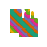

In [44]:
fw.graph_technosphere()

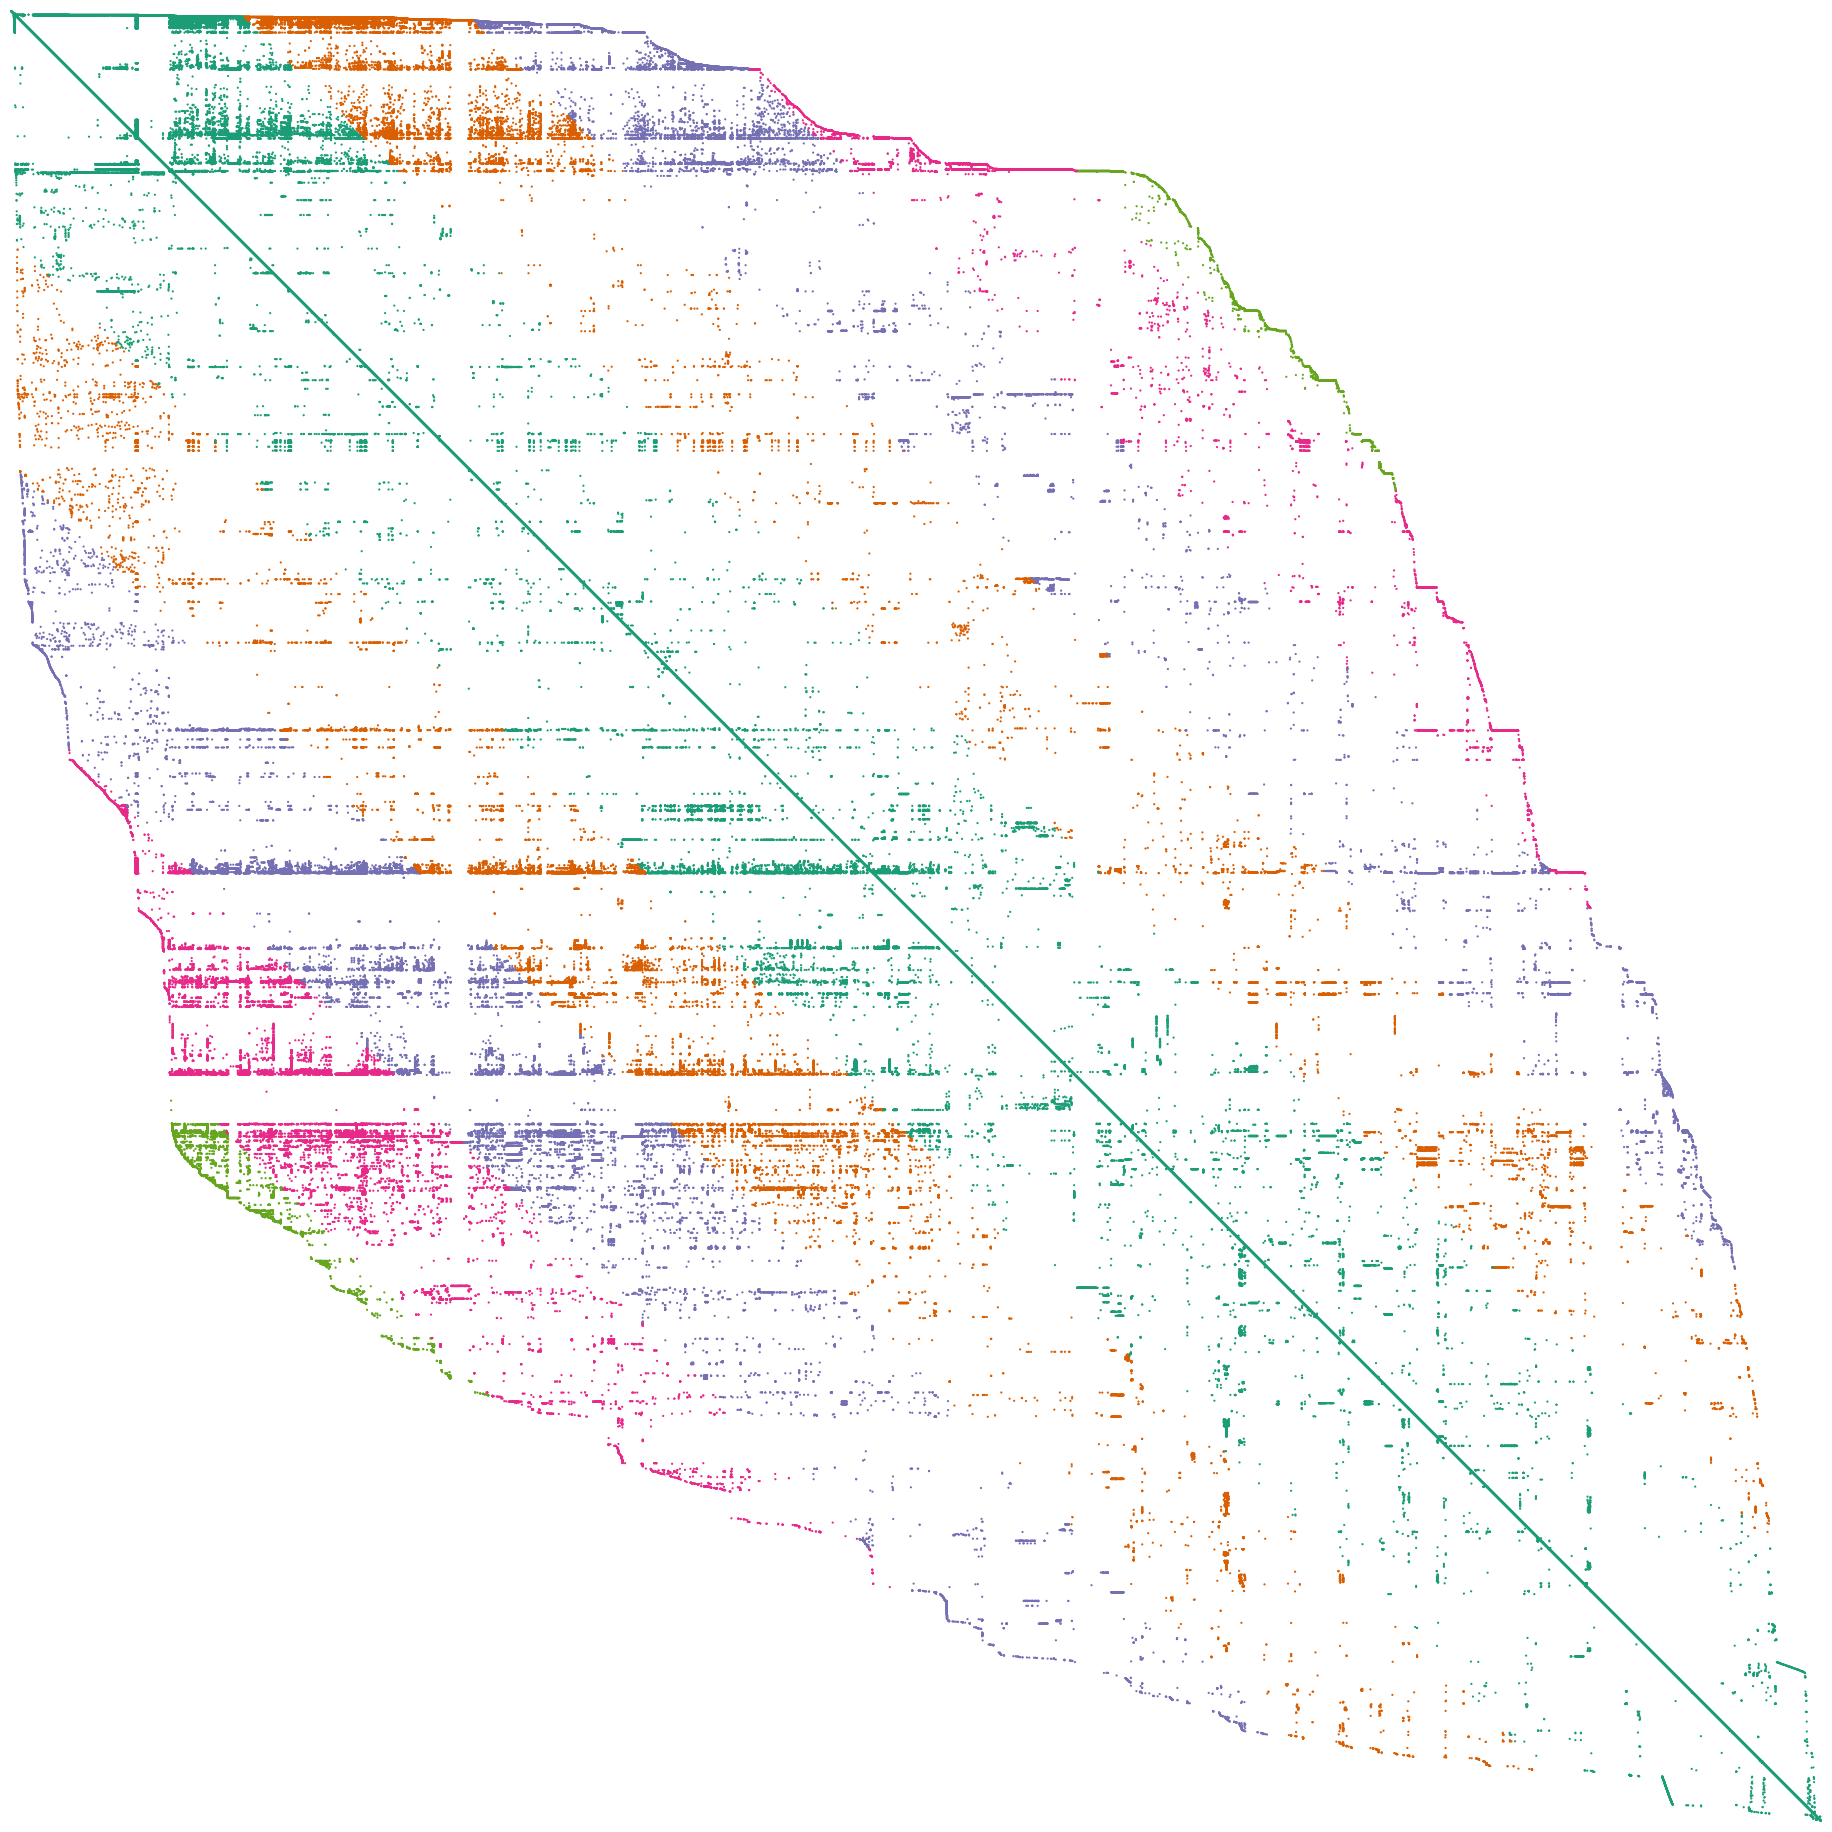

In [74]:
eidb.graph_technosphere()

Nice graphic! But it doesn't really tell us much... Let's have a bit of a closer look at what our database contains. We can, for instance, examine a random process of the imported ecoinvent database by doing the following:

In [45]:
random_act = eidb.random()
random_act.as_dict()

{'comment': 'This process describes the consumption of  diesel in fishing vessels. The process includes the combustion of diesel in marine engines. Tier 1 emission factors for fishing vessels using marine diesel oil/marine gas oil were retained, following the EMEP/Corinair 2013 guidance of the European Union.\nSystem boundaries of fishing systems\nImage: https://db3.ecoinvent.org/images/85e3ba5c-106b-4a80-8abb-da911233fc2f\nTechnology:  Emissions from fuels combusted for inland, coastal and deep-sea fishing. ',
 'classifications': [('ISIC rev.4 ecoinvent', '0311:Marine fishing'),
  ('EcoSpold01Categories', 'oil/fuels'),
  ('CPC',
   '4312: Internal combustion engines of a kind used for motor vehicles')],
 'activity type': 'ordinary transforming activity',
 'activity': 'c693a174-8dfa-4162-be2b-ec715723e325',
 'database': 'ecoinvent 3.6_cut-off_ecoSpold02',
 'filename': 'c693a174-8dfa-4162-be2b-ec715723e325_79838d89-26c0-4781-b17f-a0deb787d482.spold',
 'location': 'GLO',
 'name': 'diesel

To get an overview of all exchanges of the selected process, type:

In [46]:
for exc in random_act.exchanges():
    print(exc)

Exchange: 0.0234192037470726 kilogram 'market group for diesel' (kilogram, GLO, None) to 'diesel, burned in fishing vessel' (megajoule, GLO, None)>
Exchange: 1.0 megajoule 'diesel, burned in fishing vessel' (megajoule, GLO, None) to 'diesel, burned in fishing vessel' (megajoule, GLO, None)>


And if you want to get more information on one specific exchange of the chosen process, do:

In [47]:
#change the numeral to check out the other exchanges (as from the list above)
[exc for exc in random_act.exchanges()][0].as_dict()

{'flow': '291fc06d-1b3e-4077-aabb-346b588ed24b',
 'type': 'technosphere',
 'name': 'diesel',
 'classifications': {'CPC': ['33360: Gas oil']},
 'production volume': 0.0,
 'properties': {'carbon content, non-fossil': {'amount': 0.0,
   'unit': 'dimensionless'},
  'dry mass': {'amount': 1.0, 'unit': 'kg'},
  'water content': {'amount': 0.0,
   'unit': 'dimensionless',
   'comment': 'water mass/dry mass'},
  'carbon content, fossil': {'amount': 0.865,
   'unit': 'dimensionless',
   'comment': 'C-content of diesel is 86.5% (ecoinvent v2.2 report 6_IV, Tab 3.14)'},
  'wet mass': {'amount': 1.0, 'unit': 'kg'},
  'water in wet mass': {'amount': 0.0, 'unit': 'kg'},
  'carbon content': {'amount': 0.865,
   'unit': 'dimensionless',
   'comment': 'carbon content on a dry matter basis (reserved; not for manual entry)'},
  'carbon allocation': {'amount': 0.865,
   'unit': 'kg',
   'comment': 'carbon content per unit of product (reserved; not for manual entry)'}},
 'activity': '73edb796-abcf-42fb-a65

Sometimes it can also be helpful to have some activity characteristics at hand, for instance if you want to search a database using an activity's code or want to get an activity's name when only having its key...

In [48]:
#getting an activity's code
random_act['code']

'996bfcb2f8738221a43985ee83651496'

In [49]:
#getting an activity's name through its code
eidb.get(random_act['code'])

'diesel, burned in fishing vessel' (megajoule, GLO, None)

In [50]:
#getting an activity's key
random_act.key

('ecoinvent 3.6_cut-off_ecoSpold02', '996bfcb2f8738221a43985ee83651496')

In [51]:
#getting an activity's name using its key
bw.get_activity(random_act.key)

'diesel, burned in fishing vessel' (megajoule, GLO, None)

<a id='section23'></a>
## 2.3 Importing a dataset from Excel

In addition to the import of a standard background database and the manual database creation (see below), we can also import data from various file types, one of them being Excel. This works relatively smoothly, provided the Excel workbook is created correctly. In the following, we import a flawless dataset. However, if you are interested in tiny, tricky challenges regarding the Excel import, have a look [here](https://github.com/PoutineAndRosti/Brightway-Seminar-2017/blob/master/Day%201%20PM/Data%20IO.ipynb). The here used Excel file was adapted from this source, so that it works with our imported ecoinvent 3.5  database. Another way for importing an, now unknown, Excel file can be found [here](https://nbviewer.jupyter.org/urls/bitbucket.org/cmutel/brightway2/raw/default/notebooks/IO%20-%20importing%20an%20Excel%20file.ipynb). But here we'll stick to the first approach:

In [122]:
imp = bw.ExcelImporter(os.path.join("excel_importer_example.xlsx"))
imp.apply_strategies()
imp.match_database(fields=('name', 'unit', 'location'))
imp.match_database("ecoinvent 3.6_cut-off_ecoSpold02", fields=('name', 'unit', 'location'))
imp.statistics()

C:\Users\DELL\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Extracted 2 worksheets in 0.15 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 213.93 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
2 datasets
7 exchanges
0 unlinked exchanges
  


(2, 7, 0)

You can check whether the import went as expected by having a look at an Excel sheet, that includes our process data. The location of this file is given as output of the following command:

In [123]:
imp.write_excel()

Wrote matching file to:
C:\Users\DELL\AppData\Local\pylca\Brightway3\StepByStep.68d8c641ebe12c46d077d8ff720c3bbd\output\db-matching-BW2-Excel-water-bottle-import.xlsx


Seems like everything went fine :)

If an exchange cannot be linked using the above applied strategies, because the respective input is listed multiple times in the database, you would have to link it manually. An example for such a case is `treatment of aluminium scrap, post-consumer, prepared for recycling, at refiner`, for which two ecoinvent (3.5 cutoff) entries exist.

Having imported the data, we also need to write it to a database to save it:

In [124]:
imp.write_database()

Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/19/2023 12:36:08
  Finished: 06/19/2023 12:36:08
  Total time elapsed: 00:00:00
  CPU %: 100.80
  Memory %: 12.08
Created database: BW2 Excel water bottle import


In [128]:
bw.databases

Databases dictionary with 4 object(s):
	BW2 Excel water bottle import
	biosphere3
	ecoinvent 3.6_cut-off_ecoSpold02
	forwast

In [129]:
wbi = bw.Database("BW2 Excel water bottle import")
for act in wbi:
    print(act)

'water bottle production' (unit, CA-QC, ('I extracted this', 'from Excel'))
'Drinking water from a bottle' (liter, CH, ('Let us make up', 'consumption'))


In [130]:
wbp = [act for act in wbi][0]
for exc in wbp.exchanges():
    print(exc)

Exchange: 0.005 unit 'water bottle production' (unit, CA-QC, ('I extracted this', 'from Excel')) to 'Drinking water from a bottle' (liter, CH, ('Let us make up', 'consumption'))>
Exchange: 1 kilogram 'market for tap water' (kilogram, CH, None) to 'Drinking water from a bottle' (liter, CH, ('Let us make up', 'consumption'))>
Exchange: 1 liter 'Drinking water from a bottle' (liter, CH, ('Let us make up', 'consumption')) to 'Drinking water from a bottle' (liter, CH, ('Let us make up', 'consumption'))>


See whether the details of our biosphere exchange are correct:

In [131]:
ex = [act for act in wbi if 'water bottle production' in act['name']][0]
[exc for exc in ex.exchanges() if 'Carbon dioxide' in str(exc)][0].as_dict()

{'name': 'Carbon dioxide, fossil',
 'amount': 0.1,
 'unit': 'kilogram',
 'database': 'biosphere3',
 'categories': ('air',),
 'type': 'biosphere',
 'uncertainty type': 0,
 'input': ('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e'),
 'output': ('BW2 Excel water bottle import',
  'd80f3c8f5d04d518ab02b13aca9ab7c8')}

Final check whether really everything worked - these commands will be explained later in detail:

In [134]:
lca = bw.LCA(
    {("BW2 Excel water bottle import", "WriteSomeCode_UUID_isFineButNotNecessary"): 1}, 
    ('IPCC 2013', 'climate change', 'global warming potential (GWP100)')
)
lca.lci()
lca.lcia()
lca.score

0.0004999999962747095

Ok, enough with that. Let's delete this database (not the Excel file!) and the associated variables now:

In [158]:
del databases[wbi.name]
#or:
#wbi.delete()
del wbi, wbp

Alternatively, we can also deregister the database, which removes all metadata:

In [160]:
bw.Database('BW2 Excel water bottle import').deregister()

KeyError: 'BW2 Excel water bottle import'

In [161]:
bw.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent 3.6_cut-off_ecoSpold02
	forwast

**Continue, or back to [table of contents](#section0)?**
***

<a id='section3'></a>
# 3. Manual database creation
In addition, let's add a new database manually. There are two very similar ways of doing so, shown below. Mind that this database needs to be saved as well so that we can work with it.

In [151]:
#One way of manually creating a database:
db1 = bw.Database('3D')
db1.register()
db1.write({('3D', 'Printer'):{
    'name': 'Printer',
    'exchanges': [],
    'unit': 'unit',
    'location': 'somewhere',
    'categories': ('in the', 'universe')
}})



#Another way of manually creating a database is to have the data in a separate dictionary and then write it into an instantiated database:
db2 = Database("example")
example_data = {
    ("example", "A"): {
        "name": "A",
        "exchanges": [{
            "amount": 1.0,
            "input": ("example", "B"),
            "type": "technosphere"
            }],
        'unit': 'kilogram',
        'location': 'here',
        'categories': ("very", "interesting")
        },
    ("example", "B"): {
        "name": "B",
        "exchanges": [],
        'unit': 'microgram',
        'location': 'there',
        'categories': ('quite', 'boring')
        }
    }

db2.write(example_data)

Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/19/2023 13:12:44
  Finished: 06/19/2023 13:12:44
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.39


Writing activities to SQLite3 database:
0% [##] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/19/2023 13:12:44
  Finished: 06/19/2023 13:12:44
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 3.40


Let's see if our databases actually exist:

In [152]:
bw.databases

Databases dictionary with 6 object(s):
	3D
	BW2 Excel water bottle import
	biosphere3
	ecoinvent 3.6_cut-off_ecoSpold02
	example
	forwast

Well, seems like it. Now, let's have a look at a random activity in our second database:

In [153]:
db2.random()

'B' (microgram, there, ('quite', 'boring'))

If we want to get some information on the number of exchanges in each activity contained in the database, we type in:

In [154]:
num_exchanges = [(activity, len(activity.exchanges())) for activity in db2]
num_exchanges

[('B' (microgram, there, ('quite', 'boring')), 0),
 ('A' (kilogram, here, ('very', 'interesting')), 1)]

We can also look for our activities, in this case all of them, by typing:

In [155]:
db1.search("*")

['Printer' (unit, somewhere, ('in the', 'universe'))]

However, we don't want to use these databases in the following. Therefore, we simply delete them, just like we deleted the dataset imported from an Excel file above:

In [156]:
del databases[db1.name]
del databases[db2.name]

In [157]:
#make sure that the databases got deleted
bw.databases

Databases dictionary with 4 object(s):
	BW2 Excel water bottle import
	biosphere3
	ecoinvent 3.6_cut-off_ecoSpold02
	forwast

Okay, now that we have our background data (be it manually created or imported from an existing database), it's time to model our foreground system!

**Continue, or back to [table of contents](#section0)?**
***

<a id='section4'></a>
# 4. LCIA

Before continuing with a simple product system example, the basics of the inventory caluclation shall be introduced. First, let's have a look at which LCIA methods we can access:

In [162]:
list(bw.methods)

#or use the built-in method
#bw.methods.list

#or the following
#bw.methods.items()

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'energy resources: non-renewable no LT',
  'abiotic depletion potential (ADP): fossil fuels no LT'),
 ('CML v4.8 2016 no LT',
  'eutrophication no LT',
  'eutrophication (fate not incl.) no LT'),
 ('CML v4.8 2016 no LT',
  'human toxicity no LT',
  'human toxicity (HTP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'material resources: metals/minerals no LT',
  'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')

Ok, we see that there are quite a few methods that we could use for our LCA. Can we get more details on them? Sure we can! Those details are stored as values (`bw.methods.values()`), with the method names being the keys (`bw.methods.keys()`):

In [163]:
for key in bw.methods:
    print(key, ':', bw.methods[key])

('CML v4.8 2016 no LT', 'acidification no LT', 'acidification (incl. fate, average Europe total, A&B) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9.xlsx', 'unit': 'kg SO2-Eq', 'abbreviation': 'cml-v48-2016-no-ltaa.9326888b5dfc8ad763461e87dc5a0a9e', 'num_cfs': 21}
('CML v4.8 2016 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9.xlsx', 'unit': 'kg CO2-Eq', 'abbreviation': 'cml-v48-2016-no-ltcg.ef26e472ac5329eeba834f793ba181a9', 'num_cfs': 149}
('CML v4.8 2016 no LT', 'ecotoxicity: freshwater no LT', 'freshwater aquatic ecotoxicity (FAETP inf) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9.xlsx', 'unit': 'kg 1,4-DCB-Eq', 'abbreviation': 'cml-v48-2016-no-ltef.7bcf2b54b0276df08edfbd557353fcec', 'num_cfs': 692}
('CML v4.8 2016 no LT', 'ecotoxicity: marine no LT', 'marine aquatic ecotoxicity (MAETP inf) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9

To access the description of only one method, type:

In [164]:
bw.methods.get(('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'))

{'description': '',
 'filename': 'LCIA_Implementation_3.9.xlsx',
 'unit': 'kg SO2-Eq',
 'abbreviation': 'cml-v48-2016-no-ltaa.9326888b5dfc8ad763461e87dc5a0a9e',
 'num_cfs': 21}

As you can see, this is a nested dictionary. You can also access values within the nested one, for example:

In [165]:
bw.methods.get(('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT')).get('unit')

'kg SO2-Eq'

Now, let's select a set of LCIA methods to be applied in an inventory calculation, in this case the IPCC 2013 GWP100a (no LT).

In [166]:
CC_method = [m for m in bw.methods if 'IPCC 2013' in str(m) and  'climate change' in str(m) and 'GWP100' in str(m) and not 'no LT' in str(m)][0]
CC_method

('IPCC 2013', 'climate change', 'global warming potential (GWP100)')

Let's define the functional unit/ reference flow; for now, this is only a random one, picked from our ecoinvent database:

In [167]:
# select a process to be defined as functional unit
process = eidb.random()
process

'clear-cutting, primary forest to arable land, pasture, man made' (kilogram, BR-RO, None)

In [168]:
functional_unit = {process:1}

Now we can calculate the inventory!

In [192]:
lca = LCA(functional_unit,CC_method)
print(lca)

# alternatively, you can enter both functional unit and LCIA method directly into the LCA-command:
# myFirstLCA_quick = bw.LCA({process:1}, ('IPCC 2013', 'climate change', 'GWP 100a'))

And here we perform the actual impact calculation! Mind that this does not yield an output.

In [193]:
lca.lci()
lca.lcia()

To see the actual impact as mid- or endpoint indicator (according to the impact assessment method used), we type in:

In [194]:
lca.score

66.73590102922135

This result is given in the unit specified by the impact assessment method.

You can also check which LCIA method was applied for a given result:

In [104]:
lca.method

('IPCC 2013', 'climate change', 'global warming potential (GWP100)')

To see what else you can do with the lca-object, press tab in the next cell:

In [105]:
lca.

SyntaxError: invalid syntax (2617632417.py, line 1)

**Change the method**

Now let's change the impact assessment method and experiment with two other methods, `redo_lci` and `redo_lcia`:

In [106]:
agri_land_occ = [m for m in bw.methods if 'ReCiPe Midpoint (H)' in str(m) and  'agricultural land occupation' in str(m) and not 'w/o LT' in str(m) ][0]
lca.switch_method(agri_land_occ)

IndexError: list index out of range

We can recalculate our LCI, including a changed demand, i.e. a new functional unit:

In [ ]:
demand = {process:2}
lca.redo_lci(demand)
lca.score

The above command, however, has neither adopted the changed impact assessment method, nor has it recalculated the impacts. What's more, we don't see the change of the inventory reflected in our score - simply because it wasn't recalculated. Only the inventory as well as the demand and supply arrays got changed. To recalculate our inventory with our newly chosen impact assessment method (and, if you like, an adjusted demand), we need to type the following:

In [ ]:
demand2 = {process:3}
lca.redo_lcia(demand2)
lca.score

**Additional stuff**

Ok, enough with adjustments and recalculations. Let's check out some matrices now:

- the technosphere matrix:

In [195]:
lca.technosphere_matrix

<18121x18121 sparse matrix of type '<class 'numpy.float64'>'
	with 207555 stored elements in Compressed Sparse Row format>

In [108]:
print(lca.technosphere_matrix)

  (0, 0)	0.9343142211437225
  (0, 640)	-1.0
  (0, 9779)	-747.5269775390625
  (0, 11494)	-1.2593521205417346e-05
  (0, 12046)	-0.009446410462260246
  (0, 14641)	-1.0151000022888184
  (0, 16310)	-49.897891998291016
  (0, 17131)	-0.0017888949951156974
  (1, 1)	1.0
  (1, 11814)	-1.0
  (2, 2)	1.0
  (2, 7986)	-0.019700000062584877
  (3, 3)	-1.0
  (3, 15721)	1.0
  (4, 4)	1.0
  (4, 271)	-0.30963483452796936
  (5, 5)	1.0
  (5, 12392)	-0.6694076657295227
  (6, 6)	1.0
  (6, 11021)	-0.7402832508087158
  (6, 15931)	-0.4057088792324066
  (7, 7)	1.0
  (7, 321)	-0.9924994707107544
  (8, 8)	1.0
  (8, 15419)	-0.19208218157291412
  :	:
  (18116, 12387)	0.00156594964209944
  (18116, 12914)	0.0004182677366770804
  (18116, 13000)	1.0470185998201487e-06
  (18116, 13792)	9.365243158754311e-07
  (18116, 14471)	9.365243158754311e-07
  (18116, 14505)	0.00023274576233234257
  (18116, 14643)	9.365243158754311e-07
  (18116, 14914)	0.0004182677366770804
  (18116, 14919)	9.365243158754311e-07
  (18116, 14982)	0.00037

- the biosphere matrix:

In [196]:
lca.biosphere_matrix

<2059x18121 sparse matrix of type '<class 'numpy.float64'>'
	with 405399 stored elements in Compressed Sparse Row format>

In [197]:
print(lca.biosphere_matrix)

  (0, 1154)	7.897229745146284e-12
  (0, 1212)	1.6026014959535928e-09
  (0, 1392)	3.974192086531048e-09
  (0, 1989)	0.002183999866247177
  (0, 1990)	0.00032517334329895675
  (0, 2722)	1.5446699475063497e-09
  (0, 2757)	6.815676495408596e-12
  (0, 3062)	4.304311247704806e-12
  (0, 3088)	2.774842133845823e-09
  (0, 3089)	8.980816978976236e-09
  (0, 3090)	1.2434976659481123e-10
  (0, 3091)	4.881879789309096e-09
  (0, 3092)	1.347122524641975e-09
  (0, 3093)	4.72068562018535e-09
  (0, 3094)	1.3240948337767122e-09
  (0, 3095)	5.7569338185459173e-11
  (0, 3096)	2.1185515564070556e-09
  (0, 3357)	1.671128919923312e-14
  (0, 3568)	5.291966409352866e-14
  (0, 4145)	1.7795419651744915e-11
  (0, 4221)	4.1072681367104735e-10
  (0, 4290)	1.0647258630314127e-09
  (0, 4291)	3.4460010400749752e-09
  (0, 4292)	4.7713860640286043e-11
  (0, 4293)	1.873210697667105e-09
  :	:
  (2058, 17355)	6.599999778700294e-06
  (2058, 17438)	0.003120000008493662
  (2058, 17482)	0.007408239413052797
  (2058, 17506)	7.2524

- the characterisation matrix:

In [198]:
lca.characterization_matrix

<2059x2059 sparse matrix of type '<class 'numpy.float64'>'
	with 80 stored elements in Compressed Sparse Row format>

In [199]:
print(lca.characterization_matrix)

  (82, 82)	1.0
  (86, 86)	4.062399864196777
  (87, 87)	2.490999937057495
  (96, 96)	16.401809692382812
  (166, 166)	1301.2701416015625
  (167, 167)	137.56021118164062
  (168, 168)	0.8982621431350708
  (169, 169)	11123.494140625
  (274, 274)	2.354546546936035
  (275, 275)	6291.62939453125
  (276, 276)	1764.6295166015625
  (277, 277)	8.915194511413574
  (278, 278)	10239.234375
  (279, 279)	147.66224670410156
  (280, 280)	29.700000762939453
  (281, 281)	28.5
  (282, 282)	1728.470703125
  (283, 283)	6625.7802734375
  (284, 284)	4662.93701171875
  (285, 285)	12397.603515625
  (312, 312)	16069.998046875
  (459, 459)	23506.8203125
  (685, 685)	1.0
  (686, 686)	1.0
  (687, 687)	1.0
  :	:
  (831, 831)	10239.234375
  (832, 832)	29.700000762939453
  (833, 833)	29.700000762939453
  (834, 834)	29.700000762939453
  (835, 835)	12.1832275390625
  (836, 836)	12.1832275390625
  (837, 837)	1728.470703125
  (838, 838)	6625.7802734375
  (947, 947)	23506.8203125
  (948, 948)	23506.8203125
  (1694, 1694)	29.

- the inventory:

In [200]:
lca.inventory

<2059x18121 sparse matrix of type '<class 'numpy.float64'>'
	with 286817 stored elements in Compressed Sparse Row format>

In [201]:
print(lca.inventory)

  (0, 17708)	4.9243766501892036e-23
  (0, 17707)	7.202300888103595e-24
  (0, 17706)	7.466386620178603e-22
  (0, 17704)	3.870098449717207e-46
  (0, 17703)	4.170434195812963e-20
  (0, 17702)	9.767645875713745e-23
  (0, 16465)	2.3901764446870687e-22
  (0, 16391)	1.381539419775778e-19
  (0, 15916)	8.740497588490923e-14
  (0, 15915)	1.2283352158256243e-11
  (0, 15806)	5.587979466878925e-17
  (0, 15421)	1.1635067273563498e-16
  (0, 15231)	1.8316838116350013e-19
  (0, 13601)	1.0906275714135356e-20
  (0, 13510)	3.0546793498415512e-21
  (0, 13274)	6.122392377021185e-21
  (0, 12538)	2.8030813218475243e-19
  (0, 11311)	4.1346258615009057e-22
  (0, 11310)	1.9026823363943135e-20
  (0, 11309)	4.2443764680891165e-23
  (0, 11308)	6.268958684411014e-21
  (0, 11307)	1.1053437927999128e-20
  (0, 11305)	2.0437274646210803e-45
  (0, 11304)	2.10657595265522e-19
  (0, 11303)	8.2139524185805815e-22
  :	:
  (2058, 1154)	1.2202956519839923e-13
  (2058, 1130)	3.380349805923824e-13
  (2058, 1009)	1.91720013240854

- the characterised inventory:

In [202]:
lca.characterized_inventory

<2059x18121 sparse matrix of type '<class 'numpy.float64'>'
	with 16961 stored elements in Compressed Sparse Row format>

In [203]:
print(lca.characterized_inventory)

  (82, 10)	4.256524908266563e-08
  (82, 18)	1.2588659042030048e-22
  (82, 48)	1.0692894021654626e-10
  (82, 68)	1.8041154197091884e-10
  (82, 77)	2.4071553306716024e-12
  (82, 83)	2.3047305868845218e-07
  (82, 84)	3.294864008823645e-08
  (82, 104)	3.102344946635234e-10
  (82, 118)	9.747897905297355e-07
  (82, 122)	4.201996897953892e-07
  (82, 137)	4.570178259647516e-30
  (82, 149)	2.8347667315150415e-12
  (82, 224)	6.814232043215712e-07
  (82, 255)	2.5617532375534275e-08
  (82, 260)	7.997976926361754e-09
  (82, 266)	4.531305492399275e-09
  (82, 301)	3.0965924652312253e-13
  (82, 303)	8.650605323242474e-09
  (82, 305)	1.4947673152802167e-09
  (82, 306)	8.18268319935635e-12
  (82, 307)	3.5227370746844493e-11
  (82, 345)	6.989332524682944e-10
  (82, 367)	1.2275052972926074e-08
  (82, 368)	1.7755658185109075e-08
  (82, 391)	1.5311959657979465e-06
  :	:
  (2040, 17235)	2.7600594613178087e-11
  (2040, 17506)	1.85137056985567e-11
  (2040, 17546)	4.6234982588780345e-10
  (2040, 17557)	1.731917

+ and the demand as well as supply arrays:

In [204]:
lca.demand_array #contains what we entered as final demand. Check that it only contains this demand by summing up the whole array

array([0., 0., 0., ..., 0., 0., 0.])

In [205]:
lca.demand_array.sum()

1.0

In [206]:
lca.supply_array #equals the multiplication of our inverted transaction matrix by the final demand, i.e. (Ae-1)*y

array([1.05506298e-05, 4.01155140e-14, 1.21478084e-27, ...,
       0.00000000e+00, 0.00000000e+00, 2.92553104e-07])

**Continue, or back to [table of contents](#section0)?**
***

<a id='section5'></a>
# 5. Foreground system

For modeling a foreground system, a new database is created that is linked to ecoinvent via exchanges. Some steps need to be considered, exemplified below for two simple product systems.

<a id='section51'></a>
## 5.1 How to create a simple product system?

Now we want to create the product system for a fictitious aluminium waste handling process, consisting of inputs from the treatment of aluminium scrap as well as markets for transports and compressed air. For creating a product system, we need to create foreground processes that we link to background processes. For the latter, we can search in the background database. When we don't know the exact name of an activity, we can first search for the parts of the name that we are sure about, e.g. low-voltage electricity:

**Setup of technosphere**

In [207]:
#this search does not yield the complete list as we will see later
eidb.search('electricity, low voltage')

['market for electricity, low voltage' (kilowatt hour, CN-CSG, None),
 'market for electricity, low voltage' (kilowatt hour, UA, None),
 'market for electricity, low voltage' (kilowatt hour, CY, None),
 'market for electricity, low voltage' (kilowatt hour, AU, None),
 'market for electricity, low voltage' (kilowatt hour, CW, None),
 'market for electricity, low voltage' (kilowatt hour, PA, None),
 'market for electricity, low voltage' (kilowatt hour, KE, None),
 'market for electricity, low voltage' (kilowatt hour, IQ, None),
 'market for electricity, low voltage' (kilowatt hour, CD, None),
 'market for electricity, low voltage' (kilowatt hour, GE, None),
 'market for electricity, low voltage' (kilowatt hour, MN, None),
 'market for electricity, low voltage' (kilowatt hour, GT, None),
 'market for electricity, low voltage' (kilowatt hour, LB, None),
 'market for electricity, low voltage' (kilowatt hour, UY, None),
 'market for electricity, low voltage' (kilowatt hour, AZ, None),
 'mark

In [208]:
#this search, however, does yield the complete list
for act in [act for act in eidb if 'electricity, low voltage' in act['name']]:
    print(act)

'market for electricity, low voltage' (kilowatt hour, BR-Mid-western grid, None)
'market for electricity, low voltage' (kilowatt hour, NA, None)
'market for electricity, low voltage' (kilowatt hour, CA-NU, None)
'market for electricity, low voltage, label-certified' (kilowatt hour, CH, None)
'market for electricity, low voltage' (kilowatt hour, BR-Northern grid, None)
'market for electricity, low voltage' (kilowatt hour, IR, None)
'market for electricity, low voltage' (kilowatt hour, ZW, None)
'market for electricity, low voltage' (kilowatt hour, IN-Western grid, None)
'distribution network construction, electricity, low voltage' (kilometer, CH, None)
'market group for electricity, low voltage' (kilowatt hour, RLA, None)
'market for electricity, low voltage' (kilowatt hour, MK, None)
'market for electricity, low voltage' (kilowatt hour, IQ, None)
'market for electricity, low voltage' (kilowatt hour, CA-NS, None)
'distribution network construction, electricity, low voltage' (kilometer, 

'market for electricity, low voltage' (kilowatt hour, DK, None)
'market for electricity, low voltage' (kilowatt hour, BG, None)
'market for electricity, low voltage' (kilowatt hour, QA, None)
'market for electricity, low voltage' (kilowatt hour, MA, None)
'market for electricity, low voltage' (kilowatt hour, PA, None)
'market for electricity, low voltage' (kilowatt hour, SE, None)
'market for electricity, low voltage' (kilowatt hour, EE, None)
'market for electricity, low voltage' (kilowatt hour, TM, None)
'market for electricity, low voltage' (kilowatt hour, RO, None)
'market for electricity, low voltage' (kilowatt hour, US-NPCC, None)
'market for electricity, low voltage' (kilowatt hour, JP, None)
'market group for electricity, low voltage' (kilowatt hour, BR, None)
'market for electricity, low voltage' (kilowatt hour, ZA, None)
'market for electricity, low voltage' (kilowatt hour, AL, None)
'market for electricity, low voltage' (kilowatt hour, BO, None)
'market for electricity, low 

In [218]:
for act in [act for act in eidb if 'compressed air, 600 kPa gauge' in act['name']]:
    print(act)

'market for compressed air, 600 kPa gauge' (cubic meter, RoW, None)
'market for compressed air, 600 kPa gauge' (cubic meter, RER, None)


From this list, we can select the target activity through a more narrow description including indexing.

In [209]:
process = [act for act in eidb if 'electricity, low voltage' in act['name'] and 'CA-ON' in act['location']][0]
process

'market for electricity, low voltage' (kilowatt hour, CA-ON, None)

Have a closer look at the description of the target activity.

In [210]:
process.as_dict()

{'comment': "The shares of electricity technologies on this market are valid for the year 2016. They have been calculated by the data provider and don't necessarily correspond with the production volumes entered in the undefined datasets of the different electricity producers. The shares have been calculated based on statistics from 2016: IEA World Energy Statistics and Balances. OECD iLibrary, eISSN: 1683-4240, DOI: 10.1787/enestats-data-en and Government of Canada - Statistics Canada: StatCAN, https://www.statcan.gc.ca/eng/start. Electricity import statistics have been calculated for 2016 by Pablo Tirado (CIRAIG). Further information can be found in a report available on ecoQuery, section 'Files'.\nThis dataset describes the electricity available on the low voltage level in {{location}} for year {{year}}. This is done by showing the transmission of 1kWh electricity at low voltage.\nTechnology:  Adaptation from global aluminum industry data. It will be considered in uncertainty\nTime 

Side note: You can also find the name of an activity by its code:

In [212]:
eidb.get('5ee1eb70965f84f6bdcf31e26ec24e28')

'market for electricity, low voltage' (kilowatt hour, CA-ON, None)

Now, let's create and save a new activity for which we design the product system.

In [213]:
waste_handling = eidb.new_activity(code = 'test1', name = "Waste handling", unit = "unit")
waste_handling.save()

**Include parameters**

Adding some parameters on the project level works like the following. Mind that there are also parameters on the activity and database level. The commands for handling and saving those are quite similar; for more details, look [here](https://docs.brightwaylca.org/technical/bw2data.html#parameters)

In [214]:
project_data = [{
    'name': 'M',
    'amount': 0.06,
}, {
    'name': 'D',
    'amount': 200
}]

parameters.new_project_parameters(project_data)

In [215]:
# have a look at existing project parameters
for param in ProjectParameter.select():
    print(param, param.amount)

Project parameter: M 0.06
Project parameter: D 200.0


Let's make use of the entered parameters by parametrising the input amounts!

In [219]:
aluminium = [act for act in eidb if act['name']=='treatment of aluminium scrap, post-consumer, prepared for recycling, at refiner' and 'RER' in act['location']][0]
waste_handling.new_exchange(input=aluminium.key,amount=0,unit="kilogram",type='technosphere', formula='M').save()
waste_handling.save()

transport = [act for act in eidb if act['name']=='market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' and 'RoW' in act['location']][0]
waste_handling.new_exchange(input=transport.key,amount=0,unit="ton kilometer",type='technosphere', formula='D*M/1000').save()
waste_handling.save()

air = [act for act in eidb if act['name']=='market for compressed air, 600 kPa gauge' and 'RoW' in act['location']][0]
waste_handling.new_exchange(input=air.key,amount=0,unit="cubic meter",type='technosphere', formula='D*M/1000').save()
waste_handling.save()

Before the parameters become valid, we also need to save them by adding them to a group. Then we need to recalculate the exchanges based on the parameters.

In [220]:
parameters.add_exchanges_to_group("again another group", waste_handling)
ActivityParameter.recalculate_exchanges("again another group")

Now we can have a look at the inputs to our waste handling activity. There are two ways:

- one that quantifies the input:

In [221]:
#Have a look at all exchanges of the selected activity
for exc in waste_handling.exchanges():
    print(exc)

Exchange: 0.06 kilogram 'treatment of aluminium scrap, post-consumer, prepared for recycling, at refiner' (kilogram, RER, None) to 'Waste handling' (unit, GLO, None)>
Exchange: 0.012 ton kilometer 'market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' (ton kilometer, RoW, None) to 'Waste handling' (unit, GLO, None)>
Exchange: 0.06 kilogram 'treatment of aluminium scrap, post-consumer, prepared for recycling, at refiner' (kilogram, RER, None) to 'Waste handling' (unit, GLO, None)>
Exchange: 0.012 ton kilometer 'market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' (ton kilometer, RoW, None) to 'Waste handling' (unit, GLO, None)>
Exchange: 0.012 cubic meter 'market for compressed air, 600 kPa gauge' (cubic meter, RoW, None) to 'Waste handling' (unit, GLO, None)>


- and one that does not:

In [222]:
for act in waste_handling.technosphere():
    print(act.input)

'treatment of aluminium scrap, post-consumer, prepared for recycling, at refiner' (kilogram, RER, None)
'market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' (ton kilometer, RoW, None)
'treatment of aluminium scrap, post-consumer, prepared for recycling, at refiner' (kilogram, RER, None)
'market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' (ton kilometer, RoW, None)
'market for compressed air, 600 kPa gauge' (cubic meter, RoW, None)


Moreover, we can check on some details of our new activity:

In [223]:
#get general information on the new activity
act = eidb.get('test1')
act

'Waste handling' (unit, GLO, None)

In [224]:
#or like that
eidb.search('waste handling')

['Waste handling' (unit, GLO, None),
 'hard coal preparation' (kilogram, IN, None),
 'chromite ore concentrate production' (kilogram, GLO, None),
 'manganese concentrate production' (kilogram, GLO, None),
 'nickel mine operation, sulfidic ore' (kilogram, GLO, None),
 'nickel mine operation, sulfidic ore' (kilogram, GLO, None),
 'nickel mine operation, sulfidic ore' (kilogram, GLO, None),
 'nickel mine operation, sulfidic ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'ferromanganese production, high-coal, 74.5% Mn' (kilogram, RER, None),
 'ferrochromium production, high-carbon, 68% Cr' (kilogram, GLO, None)]

**Delete parameters and activities**

In [225]:
#delete a set of parameters; does not delete the parameter from the project parameters list?!?
name = ['M']
for name in ProjectParameter.select():
    name.delete()

In [226]:
#should delete the parameters but doesn't?!?
ProjectParameter.delete()

In [227]:
#remove the respective exchanges from the group; does not yet change anything about the exchanges?!?
parameters.remove_exchanges_from_group("again another group", waste_handling)

In [228]:
#should remove parameters, but does not really work
parameters.remove_from_group("again another group", waste_handling)

In [230]:
#Delete the list of project data (or any other dictionary); does not affect the parametrised exchanges until they get recalculated
project_data.clear() #.remove would only clear the content but leave empty instances
#quick check to see that it got deleted
for data in project_data:
    print(data)

In [231]:
#delete the table of existing project parameters, i.e. actually deletes the project parameters
ProjectParameter.drop_table(safe=True, drop_sequences=True)
#create a new empty table of project parameters
ProjectParameter.create_table()

for name in ProjectParameter.select():
    name.print()

In [232]:
#delete all waste handling activities that were accidentally created
for activity in [act for act in eidb if act['name']=='Waste handling' and 'GLO' in act['location']]:
    activity.delete()
#delete individual bottle production activity
#waste_handling.delete

In [233]:
#check that the activity actually got deleted
eidb.search('waste handling')

['hard coal preparation' (kilogram, IN, None),
 'chromite ore concentrate production' (kilogram, GLO, None),
 'manganese concentrate production' (kilogram, GLO, None),
 'nickel mine operation, sulfidic ore' (kilogram, GLO, None),
 'nickel mine operation, sulfidic ore' (kilogram, GLO, None),
 'nickel mine operation, sulfidic ore' (kilogram, GLO, None),
 'nickel mine operation, sulfidic ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'smelting and refining of nickel ore' (kilogram, GLO, None),
 'ferromanganese production, high-coal, 74.5% Mn' (kilogram, RER, None),
 'ferrochromium production, high-carbon, 68% Cr' (kilogram, GLO, None)]

Seems like it...

<a id='section52'></a>
## 5.2 Bottle production
Okay, now that we know the basics for creating (and deleting) a simple product system, we will create another one, explore it, and perform an LCA on it. So, here's a first short example on a simplified plastic bottle production. This process only has three inputs: electricity, transport, and polyethylene.

**Setup of the product system**

As mentioned earlier, the 'eidb.search' function does not give all the items that actually match the search criteria. We see this by comparing the following command with the one thereafter:

In [234]:
#incomplete search results
eidb.search('electricity production, photovoltaic, 3kWp slanted-roof installation,')#, filter={'location': 'CA-ON'})

['electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-JH, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-KL, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-CT, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-AP, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-UP, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-MP, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-TN, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilow

In [235]:
#complete search results
for act in [act for act in eidb if 'electricity production, photovoltaic, 3kWp slanted-roof installation,' in act['name']]:# and 'CA-ON' in act['location']]:
    print(act)

'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, CN-GD, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, CA-AB, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, CN-TJ, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, MY, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, MT, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, CA-NT, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, LT, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-WB, Non

'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, CN-HE, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, ribbon-Si, panel, mounted' (kilowatt hour, CH, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, MY, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, AU, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-AR, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, ZA, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-GJ, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, UA, None)
'ele

'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, ID, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, CA-YK, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, CN-YN, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, IN-AP, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, TH, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, PT, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, laminated, integrated' (kilowatt hour, RoW, None)
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, CN-JS,

In [236]:
#we can also sort our search results
list_to_be_sorted = [act for act in eidb if 'electricity production, photovoltaic, 3kWp slanted-roof installation,' in act['name']] # and 'CA-ON' in act['location']]:
newlist = sorted(list_to_be_sorted, key=lambda k: k['name'])

#for multiple keys, its works like this:
#newlist = sorted(list_to_be_sorted, key = itemgetter('name','categories'))
#or
#newlist = sorted(list_to_be_sorted, key=lambda k: (k['name'],k['categories']))

newlist

['electricity production, photovoltaic, 3kWp slanted-roof installation, CIS, panel, mounted' (kilowatt hour, RoW, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, CIS, panel, mounted' (kilowatt hour, CH, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, CdTe, laminated, integrated' (kilowatt hour, CH, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, CdTe, laminated, integrated' (kilowatt hour, RoW, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, a-Si, laminated, integrated' (kilowatt hour, CH, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, a-Si, laminated, integrated' (kilowatt hour, RoW, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, a-Si, panel, mounted' (kilowatt hour, CH, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, a-Si, panel, mounted' (kilowatt hour, RoW, None),
 '

In [239]:
#now let's refine the search and pick one activity
[act for act in eidb if 'electricity production, photovoltaic, 3kWp slanted-roof installation,' in act['name'] and 'CA-ON' in act['location']][0]

['electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted' (kilowatt hour, CA-ON, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, CA-ON, None)]

mind:
    Activities do not have very many required fields; aside from database and code, the only other required field is name, but most activities will have a location and unit as well. If no type is specified for an activity, then the activity is assumed to be a process. Other types include product and biosphere for biosphere flows. Activity type is used to determine whether an activity should be placed in the biosphere or technosphere matrices during LCA calculations.


Let's now create our [parameterised product system](https://docs.brightwaylca.org/intro.html#parameterized-datasets):

In [240]:
#The following for-loop is only to guarantee that we can create a new bottle production process
for activity in [act for act in eidb if 'Bottle production' in act['name'] and 'GLO' in act['location']]:
    activity.delete()

# activities and exchanges for simple bottle production model
bottle_production = eidb.new_activity(code = 'test1', name = "Bottle production", unit = "unit")
#bottle_production.save()

project_data = [{
    'name': 'M',
    'amount': 0.06,
}, {
    'name': 'D',
    'amount': 200
}]

parameters.new_project_parameters(project_data)

for param in ProjectParameter.select():
    print(param, param.amount)

electricity = [act for act in eidb if act['name']=='electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted, label-certified' and 'CH' in act['location']][0]
bottle_production.new_exchange(input=electricity.key,amount=0,unit="kilowatt hour",type='technosphere', formula='20*M/3.6').save()
bottle_production.save()

#mind how the following activity is treated differently! The reason for this will be shown later
polyethylene = [act for act in eidb if act['name']=='market for polyethylene, high density, granulate' and 'GLO' in act['location']][0]
pe = bottle_production.new_exchange(input=polyethylene.key,amount=0,unit="kilogram",type='technosphere', formula='M')
pe.save()
bottle_production.save()

transport = [act for act in eidb if act['name']=='market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' and 'RER' in act['location']][0]
bottle_production.new_exchange(input=transport.key,amount=0,unit="ton kilometer",type='technosphere', formula='D*M/1000').save()
bottle_production.save()

parameters.add_exchanges_to_group("again another group", bottle_production)
ActivityParameter.recalculate_exchanges("again another group")

Project parameter: M 0.06
Project parameter: D 200.0


**Cross-check the exchanges**

Let's check whether everything went ok when creating our exchanges:

In [241]:
for exc in bottle_production.exchanges():
    print(exc)

Exchange: 0.3333333333333333 kilowatt hour 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted, label-certified' (kilowatt hour, CH, None) to 'Bottle production' (unit, GLO, None)>
Exchange: 0.06 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'Bottle production' (unit, GLO, None)>
Exchange: 0.012 ton kilometer 'market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' (ton kilometer, RER, None) to 'Bottle production' (unit, GLO, None)>


In [242]:
bottle_production.as_dict()

{'database': 'ecoinvent 3.6_cut-off_ecoSpold02',
 'code': 'test1',
 'location': 'GLO',
 'name': 'Bottle production',
 'unit': 'unit'}

In [243]:
#also this works:
for key in bottle_production:
    print(key, ':', bottle_production[key])

database : ecoinvent 3.6_cut-off_ecoSpold02
code : test1
location : GLO
name : Bottle production
unit : unit


Ok, seems like everything is fine with the bottle production activity. But what about the inputs - can we check how they are actually linked? Sure! To see the **inputs** of, for instance, our polyethylene input, we type:

In [244]:
for exc in polyethylene.exchanges():
    print(exc)

Exchange: 1.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'market for polyethylene, high density, granulate' (kilogram, GLO, None)>
Exchange: 0.2887 ton kilometer 'market group for transport, freight train' (ton kilometer, GLO, None) to 'market for polyethylene, high density, granulate' (kilogram, GLO, None)>
Exchange: 0.4504 ton kilometer 'market group for transport, freight, lorry, unspecified' (ton kilometer, GLO, None) to 'market for polyethylene, high density, granulate' (kilogram, GLO, None)>
Exchange: 0.5248 ton kilometer 'market for transport, freight, sea, container ship' (ton kilometer, GLO, None) to 'market for polyethylene, high density, granulate' (kilogram, GLO, None)>
Exchange: 0.190635451504994 kilogram 'polyethylene production, high density, granulate' (kilogram, RER, None) to 'market for polyethylene, high density, granulate' (kilogram, GLO, None)>
Exchange: 2.93285310007683e-14 kilogram 'polyethylene, high density, granulate, 

And to see the **outputs** of this activity, i.e. the upstream exchanges across the whole database, we type:

In [245]:
for exc in polyethylene.upstream():
    print(exc)

Exchange: 1.1 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'fleece production, polyethylene' (kilogram, RoW, None)>
Exchange: 18.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'furnace production, wood chips, with silo, 5000kW' (unit, RoW, None)>
Exchange: 0.000532225 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'tomato production, fresh grade, open field' (kilogram, RoW, None)>
Exchange: 0.00039 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'container production, for collection of post-consumer waste plastic for recycling' (unit, RoW, None)>
Exchange: 6340.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'locomotive production' (unit, RoW, None)>
Exchange: 67500.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'paper machine production' (unit, RoW, None)

Exchange: 0.0626 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'printer production, laser, black/white' (unit, GLO, None)>
Exchange: 25423.0870520643 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'wastewater treatment facility construction, lagoon, capacity 1.0E9l/year' (unit, CA-QC, None)>
Exchange: 0.0268 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'shed construction' (square meter, RoW, None)>
Exchange: 266000.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'uranium mill construction' (unit, US, None)>
Exchange: 340.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'heat and power co-generation unit construction, 6400kW thermal, common components for heat+electricity' (unit, RoW, None)>
Exchange: 0.00073203 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 

Exchange: 0.00297464966748327 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'treatment of waste packaging paper, sanitary landfill' (kilowatt hour, GLO, None)>
Exchange: 8.58e-07 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'roof tile production' (kilogram, RER, None)>
Exchange: 2.1 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'outside air intake production, stainless steel, DN 370' (unit, RER, None)>
Exchange: 512000.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'sanitary landfill facility construction' (unit, RoW, None)>
Exchange: 0.0006 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'tissue paper production' (kilogram, RER, None)>
Exchange: 0.00049 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'irrigation, sprinkler' (cubic meter, IN, None)>
Exchange

Exchange: 0.039422 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'disk drive production, CD/DVD, ROM, for laptop computer' (unit, GLO, None)>
Exchange: 0.0117 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'packaging glass production, white' (kilogram, DE, None)>
Exchange: 0.0026 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'irrigation, drip' (cubic meter, DE, None)>
Exchange: 38300.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'sewer grid construction, 1.1E10l/year, 242 km' (kilometer, RoW, None)>
Exchange: 40.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'absorption chiller production, 100kW' (unit, RoW, None)>
Exchange: 0.00049 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'irrigation, sprinkler' (cubic meter, BR, None)>
Exchange: 170.0 kilogram 'ma

Exchange: 0.00631 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'dried roughage store construction, cold-air dried, conventional' (cubic meter, CH, None)>
Exchange: 0.2 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'furnace production, pellets, 9kW' (unit, RoW, None)>
Exchange: 0.047899997 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'greenhouse construction, plastic walls and roof, plastic tubes' (square meter-year, FR, None)>
Exchange: 0.0457 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'metal working machine production, unspecified' (kilogram, RER, None)>
Exchange: 62900.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'inert material landfill construction' (unit, RoW, None)>
Exchange: 10.6 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'housing system 

Exchange: 0.00049 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'irrigation, sprinkler' (cubic meter, ES, None)>
Exchange: 0.00039 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'container production, for collection of post-consumer waste plastic for recycling' (unit, US, None)>
Exchange: 155000.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'train production, passenger, high speed' (unit, RoW, None)>
Exchange: 1500.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'printed wiring board mounting facility construction, surface mounting line' (unit, GLO, None)>
Exchange: 0.00049 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'irrigation, sprinkler' (cubic meter, RoW, None)>
Exchange: 0.251 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'synthetic rubber producti

Exchange: 3.9 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'furnace production, wood chips, average storage area, 300kW' (unit, RoW, None)>
Exchange: 0.001106 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'tree seedling production, in unheated greenhouse' (unit, RoW, None)>
Exchange: 38300.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'sewer grid construction, 1.1E10l/year, 242 km' (kilometer, CH, None)>
Exchange: 0.00769228 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'plastic tunnel construction' (square meter, RoW, None)>
Exchange: 95500.0 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'wastewater treatment facility construction, capacity 5E9l/year' (unit, RoW, None)>
Exchange: 0.047499997 kilogram 'market for polyethylene, high density, granulate' (kilogram, GLO, None) to 'greenhouse con

... and yes, here it is. We can find our newly created exchange at the very bottom of the window!

Alternatively, we can also look straight for the **output of a new exchange** (and some other methods of the exchange). For doing so, it is important to have given a name to the exchange that you now want to examine further (as done when creating the product system).

In [246]:
pe.input, pe.output, pe.amount, pe.unit, pe.uncertainty_type

('market for polyethylene, high density, granulate' (kilogram, GLO, None),
 'Bottle production' (unit, GLO, None),
 0,
 'kilogram',
 stats_arrays.distributions.undefined.UndefinedUncertainty)

Mind that the **amount equals to zero** here. This might possibly be due to the fact that this amount is parametrised but was set to zero initially (or because of the parameter level, i.e. project in this case).

**Troubleshooting**

In case something went wrong during the setup of the product system, make sure to remove all parameters and the saved activities (as shown below) and rerun the window for creating the product system.

In [ ]:
#Delete the list of project data (or any other dictionary); does not affect the parametrised exchanges until they get recalculated
project_data.clear() #.remove would only clear the content but leave empty instances
#quick check to see that it got deleted
for data in project_data:
    print(data)

In [ ]:
#delete the table of existing project parameters, i.e. actually deletes the project parameters
ProjectParameter.drop_table(safe=True, drop_sequences=True)
#create a new empty table of project parameters
ProjectParameter.create_table()

for name in ProjectParameter.select():
    name.print()

In [ ]:
#delete all bottle production activities that were accidentally created
for activity in [act for act in eidb if act['name']=='Bottle production' and 'GLO' in act['location']]:
    activity.delete()
#delete individual bottle production activity
#waste_handling.delete

Now let's see whether really everthing got deleted:

In [ ]:
for exc in bottle_production.exchanges():
    print(exc)

**Definition of LCIA methods and functional unit**

In [251]:
method_key = [m for m in bw.methods if 'ReCiPe' in str(m) and  'midpoint' in str(m) and 'climate change' in str(m)][0]

functional_unit = {bottle_production:1}

**LCA calculation**

In [252]:
lca = bw.LCA(functional_unit,method_key)

In [253]:
lca.lci()
lca.lcia()

In [254]:
lca.demand

{'Bottle production' (unit, GLO, None): 1}

In [255]:
lca.method

('ReCiPe 2016 v1.03, midpoint (E) no LT',
 'climate change no LT',
 'global warming potential (GWP1000) no LT')

In [256]:
lca.score

0.15197245131029513

**Elementary and product flows**

There are a few ways to examine the elementary flows of our product system which are explained below. The same goes for product flows.

In [ ]:
eidb.filepath_processed()

In [ ]:
your_structured_array = np.load(eidb.filepath_processed())
pd.DataFrame(your_structured_array).head()

In [ ]:
pd.Series(bw.mapping).head()

In [ ]:
pd.DataFrame(lca.bio_params).head(6) 

In [ ]:
lca.activity_dict

In [ ]:
# Getting the key from the "demand" attribute:
act_key = list(lca.demand)[0].key
# Getting the column number from the activity_dict:
col_index = lca.activity_dict[act_key]
print("The column index for activity {} is {}".format(act_key, col_index))

In [ ]:
#have the numbering, i.e. the value, in the beginning
myFirstLCA_rev_activity_dict = {value:key for key, value in lca.activity_dict.items()}
myFirstLCA_rev_activity_dict

In [ ]:
lca_rev_act_dict, lca_rev_product_dict, lca_rev_bio_dict = lca.reverse_dict()

As done earlier for another product system, let's check out the technosphere:

In [ ]:
lca.technosphere_matrix

In [ ]:
print(lca.technosphere_matrix)

In [ ]:
from bw2analyzer.matrix_grapher import SparseMatrixGrapher

In [ ]:
SparseMatrixGrapher(lca.biosphere_matrix).graph()

In [ ]:
lca.technosphere_matrix

In [ ]:
SparseMatrixGrapher(lca.technosphere_matrix).ordered_graph()

If you're now wondering that this looks very similar to the result of the command `eidb.graph_technosphere()`, then you're right. The only difference is that our foreground system is now included.

Before being able to get deeper insights, we need to prepare a few variables, all based on the column index, which we get like that:

In [ ]:
print("As a reminder, the column index for  {} is  {}".format(act_key, col_index))

The column is given in *compressed sparse row* format. We can see that by doing as follows:

In [ ]:
myColumn = lca.technosphere_matrix[:, col_index]
myColumn

In [ ]:
print(myColumn)

Now let's switch from the *compressed sparse row* format to the *coordinate* format. With that we can examine our columns a bit further :) And, interestingly, the print-outs of our columns look exactly the same.

In [ ]:
myColumnCOO = myColumn.tocoo()
myColumnCOO

The output is unchanged for that:

In [ ]:
print(myColumnCOO)

In [ ]:
myColumnCOO.row

Let's have a look again at the identifiers of our foreground activities:

In [ ]:
[lca_rev_product_dict[i] for i in myColumnCOO.row]

Through these identifiers we can also get the names of our activities:

In [ ]:
names_of_my_inputs = [bw.get_activity(lca_rev_product_dict[i])['name'] for i in myColumnCOO.row]
names_of_my_inputs

And those names can of course be linked to the actual amounts (which then looks much nicer in a table than above, only with the keys).

In [ ]:
# First create a dict with the information I want:
myColumnAsDict = dict(zip(names_of_my_inputs,myColumnCOO.data))
# Create Pandas Series from dict
pd.Series(myColumnAsDict, name="A series with information on exchanges in my foreground process")

An alternative way to generate such a table is as follows, not depending on all the column-preparation...

In [ ]:
pd.Series({bw.get_activity(exc.input)['name']:exc.amount for exc in bottle_production.technosphere()}, 
          name="alternative way to generate exchanges")

Which, to be honest, does not give more information than the command we already used a couple of times (the data is simply presented in a different way):

In [ ]:
for exc in bottle_production.exchanges():
    print(exc)

**Continue, or back to [table of contents](#section0)?**
***

<a id='section6'></a>
# 6. Manipulating an exchange

In the following, we want to manipulate the electricity exchange. This we want to do by not only changing the amount, but by manipulating the underlying formula.

<a id='section61'></a>
## 6.1 Copying and deleting activities

First, let's copy our bottle production product system!

In [ ]:
bottle_production_copy = bottle_production.copy()

To see whether it really got copied, let's have a look at the exchanges:

In [ ]:
for exc in bottle_production_copy.exchanges():
    print(exc)

In [ ]:
bottle_production_copy.save()

Ok, seems like it worked.

You can delete the entire technosphere of an activity like this:

In [ ]:
bottle_production_copy.technosphere().delete()

If you even want to delete the activity itself, you can do it this way:

In [ ]:
bottle_production_copy.delete()

Check whether the activity is still in the database:

In [ ]:
bottle_production_copy in eidb

But now let's get our copy back and start working with it:

In [ ]:
bottle_production_copy = bottle_production.copy()
bottle_production_copy.save()

In [ ]:
bottle_production_copy.as_dict()

<a id='section62'></a>
## 6.2 First attempts at manipulating an exchange's keys/values

First a short reminder what an exchange of our activity looks like. Let's for example take the first exchange, which is electricity. There are different ways of getting (almost) the same information:

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][0]

In [ ]:
print([exc for exc in bottle_production_copy.exchanges()][0].items)

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][0].as_dict()

And quite obviously the output of this exchange is our bottle production...

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][0].output

Let's have a look at the formula of our exchange of interest - there's again two ways of doing so:

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][0]['formula']

In [ ]:
print([exc for exc in bottle_production_copy.exchanges()][0].get('formula'))

Let's see if we can manipulate this formula or the exchange in general:

In [ ]:
#add another key with value
[exc for exc in bottle_production_copy.exchanges()][0]['key']='value'

In [ ]:
del [exc for exc in bottle_production_copy.exchanges()][0]['key']

In [ ]:
#change the formula and by that the amount of our exchange
#[exc for exc in bottle_production_copy.exchanges()][0].update({'formula': '40*M/3.6'})
list(exc for exc in bottle_production_copy.exchanges())[0].update({'formula': '40*M/3.6'})
[exc for exc in bottle_production_copy.exchanges()][0].save()
bottle_production_copy.save()

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][0]

In [ ]:
list(exc for exc in bottle_production_copy.exchanges())[0]

In [ ]:
example = [exc for exc in bottle_production_copy.exchanges()][0]
print(example.update({'formula': '40*M/3.6'}))
example

In [ ]:
example.update? #no the update command is used differently.

In [ ]:
bottle_production_copy.substitution? #no, the substitution command is used for something else.

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][0].update

In [ ]:
#change the formula and by that the amount of our exchange
[exc for exc in bottle_production_copy.exchanges()][0]['formula']='40*M/3.6'

In [ ]:
#see if the formula in the respective exchange changed
[exc for exc in bottle_production_copy.exchanges()][0].as_dict()

Ok, so we see that nothing of this really works. Maybe we'll still find a solution for doing so. Actually we are super close, jsut a tiny part needs to be changed. But for now, let's try to substitute an exchange first.

<a id='section63'></a>
## 6.3 Substituting an exchange

So, let's first delete our activity and then recreate it:

In [ ]:
#delete individual bottle production activity
bottle_production_copy.delete()

In [ ]:
#delete all bottle production activities that were accidentally created
for activity in [act for act in eidb if act['name']=='Bottle production copy' and 'GLO' in act['location']]:
    activity.delete()

In [ ]:
bottle_production_copy = bottle_production.copy(code='test2', name="Bottle production copy")
bottle_production_copy.save()

Check whether the copy was actually created and saved:

In [ ]:
eidb.search('Bottle production')#, filter={'code': 'test2'})

Let's have a look at the exchanges of our production system:

In [ ]:
[exc for exc in bottle_production_copy.exchanges()]

Once again, let's see the details of our exchange of interest, i.e. electricity:

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][0].as_dict()

Reminder: We can also see all upstream exchanges of our activity of interest, i.e. electricity production:

In [ ]:
[exc for exc in electricity.upstream()]

#same as:
#for exc in electricity.upstream():
#    print(exc)

Now let's delete an exchange either from the upstream or the downstream perspective:

In [ ]:
#downstream
[exc for exc in bottle_production_copy.exchanges()][0].delete()

In [ ]:
#upstream
[exc for exc in electricity.upstream()][2].delete()

Now we add a new exchange as replacement for our deleted one. This action has to be validated by adding the exchange to the group so that the amount (calculated through a formula) is correct.

In [ ]:
#this is our replacement for the original electricity input
el_subst = [act for act in eidb if act['name']=='electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted, label-certified' and 'CH' in act['location']][0]

In [ ]:
bottle_production_copy.new_exchange(input=el_subst.key,amount=0,unit="kilowatt hour",type='technosphere', formula='40*M/3.6').save()
bottle_production_copy.save()

parameters.add_exchanges_to_group("again another group", bottle_production_copy)
ActivityParameter.recalculate_exchanges("again another group")

Let's check our exchanges and whether we got what we wanted!

In [ ]:
[exc for exc in bottle_production_copy.exchanges()]

Yesss!!! Now, a more in-detail look at our exchange of interest (especially regarding the formula and the amount):

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][2].as_dict()

<a id='section64'></a>
## 6.4 Successfully manipulating an exchange

Now let's finally manipulate a key,value pair of an exchange. There are two ways for doing so, depending on whether you want to assign a name to your exchange. **Alternative A** is the long version, **alternative B** the short one.

+ **Alternative A**

Here, we want to first add another exchange to our production system, assign a variable to it, and then change its amount through an adjustment of its formula.

In [ ]:
#add another electricity source to our bottle production system
el_extra = [act for act in eidb if act['name']=='electricity production, photovoltaic, 3kWp slanted-roof installation, single-Si, panel, mounted, label-certified' and 'CH' in act['location']][0]

el_ext = bottle_production_copy.new_exchange(input=el_extra.key,amount=0,unit="kilowatt hour",type='technosphere', formula='10*M/3.6')
el_ext.save()
bottle_production.save()

parameters.add_exchanges_to_group("again another group", bottle_production_copy)
ActivityParameter.recalculate_exchanges("again another group")

In [ ]:
#check our exchanges
[exc for exc in bottle_production_copy.exchanges()]

In [ ]:
#have a look at the created exchange
el_ext.as_dict()

In [ ]:
#let's change the amount of this exchange through an adjustment of the formula

#btw: for getting a subset of the exchange-dictionary, you can type (to get the formula):
#wanted_key = ['formula']
#formula = dict((k, el_ext[k]) for k in wanted_key if k in el_ext)

el_ext['formula']='20*M/3.6'

el_ext.save()
bottle_production.save()

parameters.add_exchanges_to_group("again another group", bottle_production_copy)
ActivityParameter.recalculate_exchanges("again another group")

In [ ]:
#check whether it worked and got adopted in the product system
[exc for exc in bottle_production_copy.exchanges()]

Great! It worked.

+ **Alternative B**

A quicker way for changing the formula of an exchange is to do the following. This also allows to manipulate exchanges that have no name (as compared to `el_ext` in the above example); you just need to give an intermediate name to the respective exchange.

In [ ]:
el_exc=[exc for exc in bottle_production_copy.exchanges()][3]
el_exc['formula']='30*M/3.6'
el_exc

el_exc.save()
bottle_production.save()

parameters.add_exchanges_to_group("again another group", bottle_production_copy)
ActivityParameter.recalculate_exchanges("again another group")

In [ ]:
#let's see whether our change got adopted in the exchange-dictionary
[exc for exc in bottle_production_copy.exchanges()][3].as_dict()

In [ ]:
#check whether it is also included in the product system
[exc for exc in bottle_production_copy.exchanges()]

Yeah, awesome! Now we know how to do that.

**Troubleshooting**

If anything went wrong when copying or manipulating an activity, you can do the following things and restart - but if there's no error message anywhere, don't execute these following commands, because we will use our bottle production systems later again:

* Only delete a selected exchange (via two ways) - be sure to index correctly, otherwise you may have to reinstantiate your database:

In [ ]:
[exc for exc in bottle_production_copy.exchanges()][0].delete()

In [ ]:
[exc for exc in electricity.upstream()][2].delete()

- Delete all exchanges that you copied accidentally:

In [ ]:
for act in [act for act in eidb if 'Bottle production copy' in act['name'] and 'GLO' in act['location']]:
    act.delete()

**Continue, or back to [table of contents](#section0)?**
***

<a id='section7'></a>
# 7. Basic contribution analysis

Based on the bottle production product system: Let's have a bit of a closer look at the inventory and the contributions of individual exchanges/activities!

But before that, we recalculate our inventory:

<a id='section71'></a>
## 7.1 Recalculation of the inventory

In [ ]:
#these are our method and functional unit, same as above in section 5.
method_key = [m for m in bw.methods if 'ReCiPe' in str(m) and  'Midpoint (H)' in str(m) and 'climate change' in str(m)][0]

functional_unit = {bottle_production:1}

In [ ]:
lca = bw.LCA(functional_unit, method_key)

In [ ]:
lca.lci()
lca.lcia()

In [ ]:
lca.demand

In [ ]:
lca.method

In [ ]:
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit.keys())[0]['name'],
    lca.score,
    bw.methods.get(method_key).get('unit')
    ))

And now over to the contribution analysis. Let's find the most damaging activities and biosphere flows.

<a id='section72'></a>
## 7.2 Basic contribution analysis

In [ ]:
import bw2analyzer as bwa

In [ ]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_processes(lca, limit=5) #returns a list of tuples: (lca score, supply amount, activity name)

We can also set a limit below one, which will filter by fraction of impact instead of number of activities; we can also return activity keys instead of names.

In [ ]:
#change "False" to "True" and this command will give a similar result as the following one, only that we set a limit here
ca.annotated_top_processes(lca, names=False, limit=0.001, limit_type='percent')

Another way of listing the most contributing activities is this:

In [ ]:
lca.top_activities() #this command essentially relies on the annotated_top_process command from above. Hence, the output is given as (lca score, supply amount, activity name)

And of course we can do the same for elementary flows:

In [ ]:
ca.annotated_top_emissions(lca, limit=0.02, limit_type='percent')

In [ ]:
#or like that
lca.top_emissions()

Notice that you can use the bw2analyzer.ContributionAnalysis method for analysing your results further, for instance through a Hinton matrix - see for yourself:

In [1]:
ca.hinton_matrix(lca, rows=10, cols=10)

NameError: name 'ca' is not defined

<a id='section73'></a>
## 7.3 Top emissions and processes by name

In addition to the basic contribution analysis, we can also look at individual activities (columns) or flows (rows).

What if we want to group names together, i.e. to get the total impact for all "phosphates"? There isn't a built-in function for this, but it is relatively easy to do. Let's start with creating different lists:

In [ ]:
from collections import defaultdict

#get the keys for each biosphere flow of the same name
all_unique_names_and_their_keys = defaultdict(list)

for flow in bw.Database("biosphere3"):
    if flow.key in lca.biosphere_dict:
        all_unique_names_and_their_keys[flow['name']].append(flow.key)
    
all_unique_names_and_their_keys

In [ ]:
#get the rows for all biosphere flows of the same name
all_unique_names_and_their_rows = {
    name: [lca.biosphere_dict[key] for key in keys] 
    for name, keys in all_unique_names_and_their_keys.items()
}

all_unique_names_and_their_rows

In [ ]:
#get the scores for all biosphere flows of the same name
all_unique_names_and_their_scores = {
    name: [lca.characterized_inventory[row, :].sum() for row in rows]
    for name, rows in all_unique_names_and_their_rows.items()
}

all_unique_names_and_their_scores

Now, let's sort this list by the score and only display the first 10 results.

In [ ]:
#get the first 10 scores of the most contributing biosphere flows
sorted_scores = sorted(
    [(sum(scores), name) for name, scores in all_unique_names_and_their_scores.items()], 
    reverse=True
)

sorted_scores[:10]

We can also encapsulate all this functionality in a single function.

In [ ]:
from collections import defaultdict

def top_emissions_by_name(lca, biosphere_database='biosphere3'):
    names = defaultdict(list)

    for flow in bw.Database("biosphere3"):
        if flow.key in lca.biosphere_dict:
            names[flow['name']].append(
                lca.characterized_inventory[lca.biosphere_dict[flow.key], :].sum()
            )
    
    return sorted(
        [(sum(scores), name) for name, scores in names.items()], 
        reverse=True
    )

In [ ]:
top_emissions_by_name(lca)[:5]

We can see that this function also groups emissions according to their type, e.g. all fossil carbon dioxide emissions are summed to "Carbon dioxide, fossil", as compared to the command in the top `ca.annotated_top_emissions`.

Possibly we can do the same for the technosphere flows with only slight adaptations to the above function:

In [ ]:
from collections import defaultdict

def top_processes_by_name(lca, technosphere_database='ecoinvent 3.5_cutoff_ecoSpold02'):
    names = defaultdict(list)

    for flow in eidb:
        if flow.key in lca.activity_dict:
            names[flow['name']].append(
                lca.characterized_inventory[:, lca.activity_dict[flow.key]].sum()
            )
    
    return sorted(
        [(sum(scores), name) for name, scores in names.items()], 
        reverse=True
    )

In [ ]:
top_processes_by_name(lca)[:5]

Let's check whether both the top_processes_by_name and the top_emissions_by_name equal our lca.score:

In [ ]:
l = [t[0] for t in top_processes_by_name(lca)]
sum(l)

In [ ]:
l = [t[0] for t in top_emissions_by_name(lca)]
sum(l)

In [ ]:
lca.score

Well, I guess we can say that is close enough, as these tiny deviations may be due to some rounding errors.

**Continue, or back to [table of contents](#section0)?**
***

<a id='section8'></a>
# 8. Multi-LCA

To speed up comparative LCA, i.e. to compare multiple product alternatives (possibly across multiple impact categories), we can use the M-LCA functionality.

<a id='section81'></a>
## 8.1 Manually comparing products

The original code for such a comparative static LCA can be found [here](https://nbviewer.jupyter.org/github/PascalLesage/Shared-BW2-notebooks/blob/master/Comparative%20static%20LCA%20in%20Brightway2.ipynb). Here, we want to look at **bananas instead of dairy**. So let's see which activities we have in ecoinvent:

In [ ]:
bananas_unsorted = [act for act in eidb if 'banana' in act['name']]
bananas = sorted(bananas_unsorted, key=lambda k: k['name'])
bananas

Of these activities, we now select the banana production processes for Colombia, Costa Rica, and India, and we select three impact methods on climate change, land use, and water stress.

In [ ]:
banana_CO = [act for act in eidb if 'banana' in act['name'] and 'CO' in act['location']][0]
banana_CR = [act for act in eidb if 'banana' in act['name'] and 'CR' in act['location']][0]
banana_IN = [act for act in eidb if 'banana' in act['name'] and 'IN' in act['location']][0]

inventory = [banana_CO, banana_CR, banana_IN]

methods = [[m for m in bw.methods if 'ReCiPe Midpoint (H)' in str(m) and 'climate change' in str(m)][0],
           [m for m in bw.methods if 'ReCiPe Midpoint (H)' in str(m) and  'agricultural land occupation' in str(m) and not 'w/o LT' in str(m) ][0],
           [m for m in bw.methods if 'ReCiPe Midpoint (H)' in str(m) and  'water depletion' in str(m) and not 'w/o LT' in str(m) and not 'V1.13' in str(m)][0]]

print("Let's compare\n{},\n{}, and\n{}".format(banana_CO, banana_CR, banana_IN))

In [ ]:
results = []

for banana in inventory:
    lca = bw.LCA({banana:1})
    lca.lci()
    for method in methods:
        lca.switch_method(method)
        lca.lcia()
        results.append((banana["name"], banana["location"], method[1].title(), lca.score, bw.methods.get(method).get('unit')))
results

We should probably present these results in a nicer form. Let's use `pandas` for that:

In [ ]:
results_df = pd.DataFrame(results, columns=["Name", "Location", "Method", "Score", "Unit"])
results_df = pd.pivot_table(results_df, index = ["Name", "Location"], columns = ["Method", "Unit"], values = "Score")
results_df

In [ ]:
df = pd.DataFrame.from_dict(results).T
df

We can also normalise these results, which may help to get a better overview:

In [ ]:
NormResults_df = results_df / results_df.max()
NormResults_df

Sidenote: We can certainly run this kind of comparative LCA with our own product systems, e.g. the bottle production from above. We would just have to select the respective reference flow...

<a id='section82'></a>
## 8.2 Calculation setups

A faster way of running comparative LCAs is through calculation setups. So, let's get familiar with them! This can be done best by just employing random activities as funcitonal units and selecting the LCIA methods which can be applied to the present biosphere flows (only a subset of these ones). Due to computation time, we decide to use the FORWAST database instead of ecoinvent - although this certainly works, too.

In [ ]:
# define the functional units and LCIA methods; taken from example notebook
functional_units = [{fw.random(): 1} for _ in range(20)]

import random

all_forwast_flows = {exc.input for ds in fw for exc in ds.biosphere()}
suitable_methods = [method 
                    for method in bw.methods 
                    if {cf[0] for cf in Method(method).load()}.intersection(all_forwast_flows)]

print("Can use {} of {} LCIA methods".format(len(suitable_methods), len(bw.methods)))
chosen_methods = random.sample(suitable_methods, 8)

In [ ]:
functional_units

In [ ]:
chosen_methods

Now we come to the actual calculation setup which gets defined through our functional units and the chosen LCIA methods:

In [ ]:
my_calculation_setup = {'inv': functional_units, 'ia': chosen_methods}

In [ ]:
calculation_setups['set of calculation setups'] = my_calculation_setup

In [ ]:
mlca = MultiLCA('set of calculation setups')
mlca.results

Hm, does not seem to be so difficult. Therefore, let's try it on a better chosen example.

<a id='section83'></a>
## 8.3 MLCA

Let's decide on our LCIA method selection:

In [ ]:
[m for m in bw.methods if 'ReCiPe' in str(m) and  'Midpoint (H)' in str(m) and 'land' in str(m)][:3]

Now a different way fo setting up our list of selected LCIA methods:

In [ ]:
land_methods = [m for m in bw.methods if 'ReCiPe' in str(m) and  'Midpoint (H)' in str(m) and 'land' in str(m)][:3]
methods = land_methods + [[m for m in bw.methods if 'ReCiPe' in str(m) and  'Midpoint (H)' in str(m) and 'climate change' in str(m)][0],
          [m for m in bw.methods if 'ReCiPe' in str(m) and  'Midpoint (H)' in str(m) and 'water depletion' in str(m)][0]]
print(methods)

And now we calculate the results for one functional unit (our banana production from above) and multiple LCIA methods:

**One functional unit, multiple impact categories**

In [ ]:
all_scores = {}
banana_lca = bw.LCA({banana_CO:1}, methods[0])
banana_lca.lci()
banana_lca.lcia()
for category in methods:
    banana_lca.switch_method(category)
    banana_lca.lcia()
    all_scores[category] = {}
    all_scores[category]['score'] = banana_lca.score
    all_scores[category]['unit'] = bw.Method(category).metadata['unit']
    print("The score is {:f} {} for impact category {}".format(banana_lca.score, 
                                                 bw.Method(category).metadata['unit'],
                                                 bw.Method(category).name)
    )

We can certainly present these results also in a nice table:

In [ ]:
df = pd.DataFrame.from_dict(all_scores).T
df

And now let's visualise the results only for the scores that have the same unit, i.e. in this example agricultural and urban land occupation.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df_m2 = df[df['unit']=='square meter-year']
df_m2

In [ ]:
df_m2.plot(kind='barh')

And of course we can find the relative contributions for our selected functional unit, too:

In [ ]:
banana_lca_unitProcessContribution = banana_lca.characterized_inventory.sum(axis=0).A1
banana_lca_unitProcessRelativeContribution = banana_lca_unitProcessContribution/banana_lca.score
banana_lca_unitProcessRelativeContribution

And now we calculate the results for multiple functional units and multiple LCIA methods:

**Multiple functional units, multiple impact categories**

In [ ]:
#Set up the production system
prod_sys = [{banana_CO.key:1}, {banana_CR.key:1}, {banana_IN.key:1}]
prod_sys

In [ ]:
bw.calculation_setups['multiLCA'] = {'inv': prod_sys, 'ia': methods}
bw.calculation_setups['multiLCA']
myMultiLCA = bw.MultiLCA('multiLCA')
myMultiLCA.results

df_impact = pd.DataFrame(data = myMultiLCA.results, columns = methods)
df_impact

Just in case we cannot remember for some reason our functional units, we can easily find their definition again:

In [ ]:
myMultiLCA.func_units

The same certainly goes for our chosen LCIA methods:

In [ ]:
myMultiLCA.methods

**Continue, or back to [table of contents](#section0)?**
***

<a id='section9'></a>
# 9. Monte Carlo simulation

According to British statistician George Cox "all models are wrong but some are useful" - in that light, quantifying uncertainty makes LCA results more reliable/robust. One of the easiest/ most common ways to do so is to perform a [Monte Carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method), a random sampling technique. Before elaborating on that, we need to understand how uncertainty information is stored in Brightway:

### Uncertainty information in Brightway

Uncertainty is stored at the level of the exchanges - remember this! So, let's have a look at a random ecoinvent exchange:

In [ ]:
[exc for exc in eidb.random().exchanges()][0].as_dict()

The *necessary* uncertainty information of an exchange is described in the following fields:  
  - **'uncertainty type'** : type of probability distribution function that the exchange follows. For example, the uncertainty type = 2 indicates a `lognormal`  distribution.  
  - **'loc', 'scale', 'shape', 'minimum', 'maximum'**: parameters of the distribution function, which are respectively the location (mean $\mu$, mode, offset, or median), scale (e.g. standard deviation $\sigma$), and shape as well as minimum and maximum of the underlying distribution. Mind that different distribution functions require different parameters - not all parameters have to be defined for each distribution.

Some *additional* uncertainty related information ('scale without pedigree', 'pedigree') are also there, but are not directly used in the calculation of the uncertainty. They are also specific to ecoinvent.

Uncertainty in Brightway is dealt with using a Python package called `stats_arrays` (see [here](http://stats-arrays.readthedocs.io/en/latest/)), developed by Chris Mutel in the context of the development of Brightway but applicable to any stochastic model in Python. Have a look at it to see which probability distribution functions are available. And then, let's import this package!

In [ ]:
import stats_arrays

Just to give a brief example of how the uncertainty information "works", let's have a look at the lognormal distribution. As a reminder:   
  - a random variable $X$ is a lognormal if its natural logarithm $ln(X)$ is normally distributed  
  - the natural logarithm of the *median* of the lognormal distribution is equal to the median (=mean) of the underlying distribution  

Taking the deterministic amount `amount` to be the median, we should have `loc` = `ln('amount')`. Let's do this for the first exchange of a random ecoinvent activity that has a lognormal distribution:

In [ ]:
#run this cell again if the output is empty
e = [exc for exc in eidb.random().exchanges() if exc['uncertainty type'] == 2][0]
e.as_dict()

In [ ]:
e['loc'] == np.log(e['amount'])

### Basic Monte Carlo simulation

**One functional unit, one impact category**

In [ ]:
#MC simulation with 10 iterations for our banana production and the IPCC GWP100a method
mc = bw.MonteCarloLCA({banana_CO:1},  ('IPCC 2013', 'climate change', 'GWP 100a'))
scores = [next(mc) for _ in range(10)]
scores

#or this way:
#for _ in range(10):
#    print(next(mc))

Let's print the results of our MC:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(scores,bins=40)

Well, this doesn't really look like anything yet. We should increase the number of iterations - which yields more robust results. Around 10,000 iterations is a good starting point. However, this takes a while, so we will just give it a try with 1000 now. See for yourself how long it would take for a higher number of iterations.

In [ ]:
#define the number of iterations
n_runs = 1000

In [ ]:
%%time
values = [next(mc) for _ in range(n_runs)]

In [ ]:
plt.hist(values, bins=40)

We can also **run the MCs in parallel** which speeds up the computation time - see the following and compare the calculation times!

In [ ]:
# We can also create parallel Monte Carlo that will run simultations on multiple workers simultaneoulsy
bw.ParallelMonteCarlo?

In [ ]:
pmc = bw.ParallelMonteCarlo(mc.demand, mc.method, iterations=n_runs)

In [ ]:
%%time
values = pmc.calculate()

In [ ]:
plt.hist(values, bins=40)

**One functional unit, multiple impact categories**

In [ ]:
# define the function for MC simulation
def multiImpactMonteCarloLCA(functional_unit, list_methods, iterations):
    # Step 1
    MC_lca = bw.MonteCarloLCA(functional_unit)
    MC_lca.lci()
    # Step 2
    C_matrices = {}
    # Step 3
    for method in list_methods:
        MC_lca.switch_method(method)
        C_matrices[method] = MC_lca.characterization_matrix
    # Step 4
    results = np.empty((len(list_methods), iterations))
    # Step 5
    for iteration in range(iterations):
        next(MC_lca)
        for method_index, method in enumerate(list_methods):
            results[method_index, iteration] = (C_matrices[method]*MC_lca.inventory).sum()
    return results

# define the LCIA methods, functional unit, and the number of iterations
ILCD = [method for method in bw.methods if "ILCD" in str(method) and "no LT" not in str(method)]
fu = {banana_CO:1}
iterations = 100

# let it run!
test_results = multiImpactMonteCarloLCA(fu, ILCD, iterations)
test_results

In [ ]:
ILCD

In [ ]:
#we can get the plots for all 34 ILCD methods (--> type: len(ILCD)) by changing the index in the brackets
plt.hist(test_results[33], bins=40)

If you are interested in applying a **sensitivity analysis**, check out this [notebook](https://github.com/PoutineAndRosti/Brightway-Seminar-2017/blob/master/Day%202%20PM/Sensitivity%20analysis%20-%20example%20with%20PAWN%20indices.ipynb).

---

At this point, it's worth pointing again at the **[Activity browser](https://github.com/LCA-ActivityBrowser/activity-browser)** and **[LCOPT](https://lcopt.readthedocs.io/en/latest/)**. These two Brightway2-extensions serve different purposes and require different settings, so check them out if you're curious.

---

And now, last but not least, here's our reward for finishing this notebook :)

In [ ]:
from IPython.display import Image
Image(url="https://cdn.shopify.com/s/files/1/1869/0319/products/ART-dabbing-unicorn_color-powder-blue_1024x1024.jpg?v=1523903512")

**Back to [table of contents](#section0)?**
***